<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">TIPOLOGÍA Y CICLO DE VIDA DE LOS DATOS</p>
<p style="margin: 0; text-align:right;">Máster en Ciencia de Datos</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>




  
## 

#### Alumnos: Xavier Ricci y Guillermo Monzón

## PRÁCTICA 2:
#### CONTENIDO  

<div id='id00'/>


[1. PRESENTACIÓN DE LA PRÁCTICA Y DESCRIPCIÓN DEL *DATASET*](#id1)

[2. LIMPIEZA DE DATOS](#id2)

   [2.1 Pclass](#id21)  
   [2.2 Name](#id22)   
   [2.3 Sex](#id23)  
   [2.4 Sibsp](#id24)  
   [2.5 Parch](#id25)   
   [2.6 Age](#id26)  
   [2.7 Fare](#id27)  
   [2.8 Ticket](#id28)  
   [2.9 Cabin](#id29)   
   [2.10 Embarked](#id210)   
     
[3. ANÁLISIS DE LOS DATOS Y CONCLUSIONES](#id3)

   [3.1. Modelos de regresión](#id31)    
   [3.2. Combinación de modelos de regresión](#id32)  
   [3.3. Modelo Neuronal](#id33)  
   [3.4. Combinación de modelos neuronales](#id34)     

* * * 


<div id='id1'/> 

### [1. PRESENTACIÓN DE LA PRÁCTICA Y DESCRIPCIÓN DEL *DATASET* ](#id00)

Hemos escogido estudiar el dataset del Titanic de kaggle.com, porque se trata de un reto en el que participan personas que se dedican al análisis de datos de todo el mundo y nos queríamos participar en este reto. Se trata de una forma de medir nuestras capacidades dentro de este mundo profesional, ya que, aunque esta es una competición para principiantes, en ella participan muchos profesionales y equipos de personas. 
Nuestro reto inicial, era conseguir estar dentro de la lista del 10% con mejores resultados de los 23 mil equipos participantes. Cabe destacar que, aunque la mayoría de personas en esta lista están participando con códigos propios, también hay muchas personas que utilizan métodos tramposos, ya sea simplemente copiando los resultados finales y consiguiendo un imposible 100% de aciertos o utilizando los códigos de otros con alto rendimiento. 
Es de lógica entender que en cualquier situación natural estamos hablando de probabilidades a partir de una cantidad limitada de datos. Aunque se tuvieran miles de datos de cada uno de los pasajeros del Titanic una hora antes del accidente, sería imposible predecir todas las circunstancias que llevan a la supervivencia de cada una de las personas. Los que resbalaron, los que decidieron ceder su asiente en un bote salvavidas, los que pisaron a otra persona para ocupar su lugar… son circunstancias impredecibles que no se pueden calcular a partir de una docena de características. 
Entendemos que a base de mandar resultados se puede ir ajustando las respuestas a las correctas, aunque eso no sería la creación de un modelo de predicción, sino una especie de proceso de descubrimiento de una clave, y este no es nuestro objetivo. 
A decir verdad, nuestra sensación es que solo con los datos originales, nos parece fantástico poder superar el 80% de aciertos. 

Para llevar a cabo este estudio, los responsables de Kaggle, nos ofrecen un listado de  891 personas con 11 características y el resultado de supervivencia o no de cada uno de ellos. A partir de estos datos se nos propone predecir la supervivencia de 418 pasajeros a partir de las mismas 11 caracteristicas. 
 Para decidir los datos de interés a analizar entendemos que primero es necesario conocer los datos en profundidad y ver su estado, así, que empezamos directamente con el limpiado de los datos, para posteriormente decidir cuales son realmente útiles para nuestra predicción. 

Los atributos del dataset son los siguientes:  

- **PassengerId:** 
- **Survived:** indicador de supervivencia (0 - sobrevive / 1 - muere).
- **Pclass:** indicador de la clase del billete (1 - primera / 2 - segunda / 3 - tercera).
- **Name:** nombre del pasajero.
- **Sex:** sex (male - hombre  / female - mujer).
- **Age**: edad en años (si es menor de un año se estima de forma fraccionaria).
- **SibSp:** 
- **Parch:**
- **Ticket:** número de ticket.
- **Fare:** tarifa.
- **Cabin:** número de camarote.
- **Embarked:** puerto de embarque (C - Cherbourg / Q - Queenstown / S - Southamton).

Así pues, una vez realizado un proceso de limpieza del conjunto de datos trataremos de determinar cómo pudo afectar a las posibilidades de superviviencia del pasaje del Titanic en función de sus caracterísitcas: edad, sexo, clase, etc.

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns
import pylab as plot

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, adam




ModuleNotFoundError: No module named 'keras'

In [4]:
#dataset import
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Unimos ambos *datasets* para tener una visión conjunta de los mismos.

In [5]:
# Unimos ambos datasets
fullData = pd.concat([train, test], ignore_index=True, sort=False)
fullData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
fullData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [7]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [8]:
fullData_NA = fullData.isna().sum()
train_NA = train.isna().sum()
test_NA = test.isna().sum()

pd.concat([train_NA, test_NA, fullData_NA], axis=1, sort = False, keys = ['train NA', 'test NA', 'fullData NA'])

,train NA,test NA,fullData NA
PassengerId,0,0.0,0
Survived,0,NaN,418
Pclass,0,0.0,0
Name,0,0.0,0
Sex,0,0.0,0
Age,177,86.0,263
SibSp,0,0.0,0
Parch,0,0.0,0
Ticket,0,0.0,0
Fare,0,1.0,1


Vemos que entre los datos hay muchos datos vacíos, especialmente en *Cabin* y en *Age*, también observamos 2 valores vacíos en *Embarked* y uno en *Fare*. Todos ellos serán tratados adecuadamente en el apartado de limpieza de datos.  

También vemos que de las 11 atributos 2 son floats, 5 son integers y 5 son objetos.

**Vemos algunas distribuciones iniciales de los datos**

In [9]:
fullData['Survived'].value_counts(normalize = True)

0.0    0.616162
1.0    0.383838
Name: Survived, dtype: float64

Vemos que un 62% de los pasajeros murieron mientras que un 38 % se salvaron.

In [10]:
fullData[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


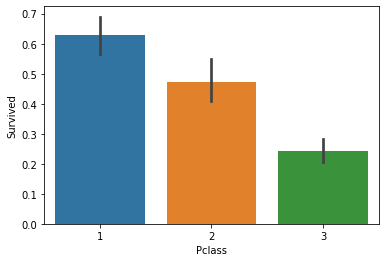

In [11]:
sns.barplot(x='Pclass', y='Survived', data=fullData)

Por otra parte, podemos observar como un 63% de los pasajeros de PRIMERA CLASE sobrevivió al naufragio. Un 47 % para SEGUNDA CLASE y los que viajaban en TERCERA CLASE tan sólo sobrevivió un 24 %.

In [12]:
fullData[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


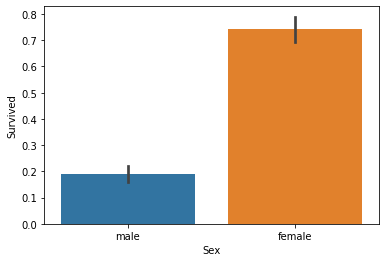

In [13]:
sns.barplot(x='Sex', y='Survived', data=fullData)

También se observa que las mujeres sobreviven significativamente más que los hombres.  

A continuacion relacionamos algunas variables, para ver su importancia en la supervivencia

Incorporando la **edad** a este análisis.

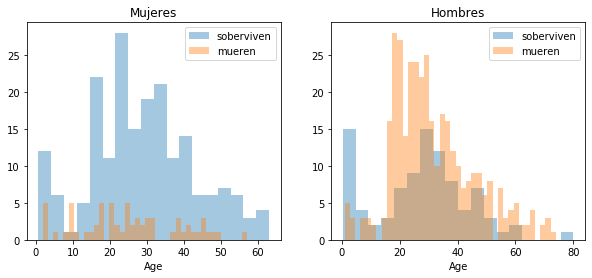

In [14]:
soberviven = 'soberviven'
mueren = 'mueren'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
mujeres = fullData[fullData['Sex']=='female']
hombres = fullData[fullData['Sex']=='male']
ax = sns.distplot(mujeres[mujeres['Survived']==1].Age.dropna(), bins=18, label = soberviven, ax = axes[0], kde =False)
ax = sns.distplot(mujeres[mujeres['Survived']==0].Age.dropna(), bins=40, label = mueren, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Mujeres')
ax = sns.distplot(hombres[hombres['Survived']==1].Age.dropna(), bins=18, label = soberviven, ax = axes[1], kde = False)
ax = sns.distplot(hombres[hombres['Survived']==0].Age.dropna(), bins=40, label = mueren, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Hombres')

Observamos que los niños también tienen tasas de supervivencia muy superiores comparados con los adultos. 

Otra característica que podemos observar de un análisis previo de los datos es que lo pasajeros que embarcan en el puerto francés de Chebourg sobreviven de forma notoriamente superior a los pasajeros del resto de puertos

In [15]:
fullData[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


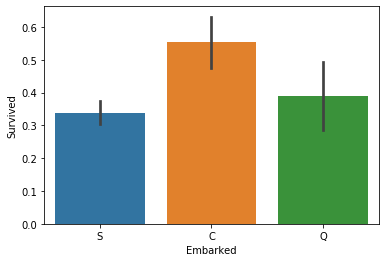

In [18]:
sns.barplot(x='Embarked', y='Survived', data=fullData)

El puerto de de embarque también parece ser un factor importante a la hora de predecir la supervivencia. 

<div id='id2'/>

## [2. LIMPIEZA DE DATOS](#id00)


Para realizar la limpieza y ajuste de los datos vamos a ir tratando variable a variable del dataset original.

In [20]:
fullData.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Comenzamos eliminando las variables *PassengerId* y *Survived*, pues no aportan nada para el análisis.  

<div id='id21'/> 

### [2.1 Pclass](#id00)

In [21]:
len(fullData[fullData['Pclass'].isna()])

0

<div id='id22'/> 

### [2.2 Name](#id00)

In [22]:
len(fullData[fullData['Name'].isna()])

0

A partir de la varible *name* podemos determinar el titutlo que nos va a ser útil más adelante. Procedemos a extraer esta información. 

In [23]:
fullData['Title'] = fullData.Name.str.extract(r',\s*([^\.]*)\s*\.', expand=False)

In [24]:
pd.unique(fullData['Title'])

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [25]:
fullData['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Mlle              2
Major             2
Dona              1
Don               1
Jonkheer          1
Lady              1
Capt              1
Sir               1
the Countess      1
Mme               1
Name: Title, dtype: int64

###### Agunas notas sobre los títulos:

Nobles: the Countess, lady is what you use to address someone of Nobility.  

Mlle = Miss

Madame = Mrs.  Usually, a servant (in Britain) addersses her Mistress as Madame.  But only if the mistress is married. 


Master = title for an underage male. If a person is under 18. En el caso del titanic todos los masters son de menos de 14.5 años. 

Colonel is a honorary title of conferred by several states in the US and certain military units of the Commonwealth of Nations.


"Ms" is a recent term for those ladies who don't think anyone needs to know whether they are married or not, like the generic 


Jonkheer is an honorific in the Low Countries denoting the lowest rank within the nobility


Veamos que relación tienen con el índice de supervivencia 

In [26]:
def sobrevivenxtitulo(titulo):
    a=(len(fullData[(fullData['Survived']==0) & (fullData['Title']==titulo)]))
    b=(len(fullData[(fullData['Survived']==1) & (fullData['Title']==titulo)]))
    print(f" de {(a+b)}, {titulo} sobreviven: {b}, un {b/(a+b)}")

titulos = pd.unique(fullData['Title'])
for titulo in titulos:
    sobrevivenxtitulo(titulo)

 de 517, Mr sobreviven: 81, un 0.15667311411992263
 de 125, Mrs sobreviven: 99, un 0.792
 de 182, Miss sobreviven: 127, un 0.6978021978021978
 de 40, Master sobreviven: 23, un 0.575
 de 1, Don sobreviven: 0, un 0.0
 de 6, Rev sobreviven: 0, un 0.0
 de 7, Dr sobreviven: 3, un 0.42857142857142855
 de 1, Mme sobreviven: 1, un 1.0
 de 1, Ms sobreviven: 1, un 1.0
 de 2, Major sobreviven: 1, un 0.5
 de 1, Lady sobreviven: 1, un 1.0
 de 1, Sir sobreviven: 1, un 1.0
 de 2, Mlle sobreviven: 2, un 1.0
 de 2, Col sobreviven: 1, un 0.5
 de 1, Capt sobreviven: 0, un 0.0
 de 1, the Countess sobreviven: 1, un 1.0
 de 1, Jonkheer sobreviven: 0, un 0.0


ZeroDivisionError: division by zero

De estos datos esperamos extraer la importancia de la clase y la profesion, para poderlos agrupar en conjuntos más relevantes

In [ ]:
Observamos los siguiente:

En los hombres:

Sr (Adultos en general): Con muy poco indice de supervivencia. Apenas el 15% sobreviven.

Master (Jovenes): Aunque a primera vista parecia que Master podia referirse a la clase social aparte de a la edad comprobamos a continuacion que simplemente se refiere a los menores de 15 anyos. De los jovenes el 57% sobreviven

Reverendos: Vemos que todos mueren (6 de 6 ya empieza a ser un valor interesante) 0% sobreviven

Doctores: 2 de 6 el 33% sobreviven

Major, Col y Capt (Militares) vemos que los rangos militares sobreviven en un 3/5, un 60% sobreviven

Los nobles: Sir, Don y Jonkheer 1/3 baja al 33.3% sobreviven

En las mujeres:

Mrs y Mme (Casadas): Con muy alto indice de supervivencia del 79% sobreviven

Miss y Mille (Solteras 0 y 63 años): 69% sobreviven

El resto son muy pocos casos para generalizar pero vemos que una doctora sobrevive y que la Lady y la Countess sobreviven.

In [27]:
#dataset import
dataTrainXY = pd.read_csv("./train.csv")
dataTestX = pd.read_csv("./test.csv")
frames = [dataTrainXY,dataTestX]
DF = pd.concat(frames, ignore_index=True, sort=False)
DF.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [28]:
titulo = DF.Name.str.extract(r',\s*([^\.]*)\s*\.', expand=False)
len(titulo)

1309

In [29]:
#Los valores originales:  'Mr', 'Mrs', 'Miss', 'Master', 'Don','Sir','Jonkheer','Major', 'Capt', 'Col', 'Rev', 'Dr', 'Mme', 'Ms', 'Mlle', 'Lady',    'the Countess']

# Las agrupaciones propuestas:
# Major, Col y Capt = Militares
# Sir, Don, Jonkheer, Lady y Countess  = Aristocratas
# Mrs y Mme (Casadas)
# Miss y Mlle (Solteras) tb incluyo Ms (porque entiendo que se trata de mujeres solas que querian evitar la presion social de no estar casadas)

lista = []
for word in titulo:
    if word == 'Don':
        lista.append('Arist')
    elif word =='Sir':
        lista.append('Arist')
    elif word =='Jonkheer':
        lista.append('Arist')
    
    elif word == 'Major':
        lista.append('Army')
    elif word =='Col':
        lista.append('Army')
    elif word =='Capt':
        lista.append('Army')
            
        
    elif word =='Mme':
        lista.append('Mrs')      
        
    elif word =='Mlle':
        lista.append('Miss')      
        
    elif word =='Ms':
        lista.append('Miss')  
        
    elif word == 'Lady':
        lista.append('Arist')
    elif word == 'the Countess':
        lista.append('Arist')
    elif word == 'Dona':
        lista.append('Arist')
          
    else:
        lista.append(word)
print(len(lista))
print(pd.unique(lista))


1309
['Mr' 'Mrs' 'Miss' 'Master' 'Arist' 'Rev' 'Dr' 'Army']


In [30]:
DF['Title'] = lista
DF.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Arist
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Master


Confirmamos la edad máxima de los *Master* y nos aseguramos que no haya niños no *Master*.

In [31]:
max(DF[DF['Title']=="Master"].Age)

14.5

In [32]:
DF[(DF["Age"]<15)&(DF["Title"]!="Master")&(DF["Sex"]=="male")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
683,684,0.0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,NaN,S,Mr
686,687,0.0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S,Mr
731,732,0.0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C,Mr
896,897,NaN,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,Mr
1121,1122,NaN,2,"Sweet, Mr. George Frederick",male,14.0,0,0,220845,65.0000,NaN,S,Mr


Convertimos a estos niños en *Master* para unificar el criterio.

In [33]:
DF.loc[(DF["Age"]<15)&(DF["Title"]!="Master")&(DF["Sex"]=="male") , "Title" ] = 'Master'
DF[(DF["Age"]<15)&(DF["Title"]!="Master")&(DF["Sex"]=="male")]




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


<div id='id23'/> 

### [2.3 Sex](#id00)

La variable *Sex* no tiene datos vacíos.

In [36]:
len(DF[DF["Sex"].isna()])

0

<div id='id24'/> 

### [2.4 SibSp](#id00)
Número de hermanos / esposas-maridos a bordo. 0 si se viajaba solo.  
Definición en el dataset:  
 *Sibling = brother, sister, stepbrother, stepsister
 *Spouse = husband, wife (mistresses and fiancés were ignored)

La variable *Sibsp* no tiene datos vacíos.

In [38]:
len(DF[DF["SibSp"].isna()])

0

<div id='id25'/> 

### [2.5 Parch](#id00)
Número de padres / niños. 0 si se viajaba soloo niños con nanny.

Definición en el dataset:  
 *Parent = mother, father
 *Child = daughter, son, stepdaughter, stepson
 *Some children travelled only with a nanny, therefore parch=0 for them.

La variable *Parch* no tiene datos vacíos.

In [39]:
len(DF[DF["Parch"].isna()])

0

<div id='id26'/> 

### [2.6 Age](#id00)


La problemática de la variable *Age*, como hemos visto en el apartado de anterior, estriba en que tiene un número elevado de valores perdidos, 263 concretamente. A continuación procedemos a resolver esta problemática asignando un valor para cada uno de los registros desconocidos de la variable edad.

Para rellenar los datos vacios con la máxima precisión posible, los agrupamos según el titulo par ver si existe alguna relación entre este y la edad, como hemos visto que sucedia con los *Master*.

In [40]:
def VerEdadXTitulo(titulo):
    medianaDeEdad = np.median(DF[(DF['Title']==titulo) & (DF["Age"].notnull())]['Age'])
    conEdad = len(DF[(DF['Title']==titulo) & (DF["Age"].notnull())]['Age'])
    sinEdad = len(DF[(DF['Title']==titulo) & (DF["Age"].isna())])
    
    print(f"La mediana de edad de los {conEdad} {titulo} con Age es de {medianaDeEdad}. Faltan: {sinEdad} ")
    
for titulo in (pd.unique(DF.Title)):
    VerEdadXTitulo(titulo)

La mediana de edad de los 576 Mr con Age es de 29.0. Faltan: 176 
La mediana de edad de los 171 Mrs con Age es de 35.0. Faltan: 27 
La mediana de edad de los 213 Miss con Age es de 22.0. Faltan: 51 
La mediana de edad de los 58 Master con Age es de 6.0. Faltan: 8 
La mediana de edad de los 6 Arist con Age es de 39.5. Faltan: 0 
La mediana de edad de los 8 Rev con Age es de 41.5. Faltan: 0 
La mediana de edad de los 7 Dr con Age es de 49.0. Faltan: 1 
La mediana de edad de los 7 Army con Age es de 53.0. Faltan: 0 


Vemos que efecticamente los titulos estan relacionados con la edad. Así que utilizamos esta referencia para rellenar los datos.
Primero corregimos los que hay menos casos: *Dr* y *Master*, asignándoles la mediana.

In [41]:
DF.loc[(DF['Title']=='Master') & (DF["Age"].isna()), "Age" ] = np.median(DF[(DF['Title']=='Master') & (DF["Age"].notnull())]['Age'])
DF[(DF['Title']=='Master') & (DF["Age"].isna())]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [42]:
DF.loc[(DF['Title']=='Dr') & (DF["Age"].isna()), "Age" ] = np.median(DF[(DF['Title']=='Dr') & (DF["Age"].notnull())]['Age'])
DF[(DF['Title']=='Dr') & (DF["Age"].isna())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


Para obtener las edades no registradas de pasajeros con los títulos de Mr, Mrs y Miss aplicaremos una regresion lineal, a partir de las variables *Pclass*, *Fare* y *Family*. Esta última la crearemos a partir de las variables *SibSP* y *Parch*.

Creamos la nueva variable *Family*.

In [43]:
DF['Family'] = DF.SibSp + DF.Parch
DF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


Para poder hacer la regresion nos aseguramos primero de que no hay elementos vacios en las columnas que utilizaremos para el modelo.

In [44]:
len(DF[DF["Pclass"].isna()])

0

In [45]:
len(DF[DF["Family"].isna()])

0

In [46]:
len(DF[DF["Fare"].isna()])


1

In [47]:
DF[DF["Fare"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr,0


Para completar este valor vacío en el precio del billete, utilizaremos la mediana del precio de pasajeros con las mismas características.

In [48]:
medianaPrecio = np.median(DF[(DF['Title']=="Mr") &   (DF['Pclass']==3)  &  (DF['Fare'].notnull()) &  (DF['Sex']=='male') & (DF["Embarked"]=='S') & (DF["SibSp"]== 0)& (DF["Parch"]== 0)]['Fare'])

DF.loc[((DF['Title']=="Mr") &   (DF['Pclass']==3)  &  (DF['Fare'].isna()) &  (DF['Sex']=='male') & (DF["Embarked"]=='S') & (DF["SibSp"]== 0)& (DF["Parch"]== 0)) , "Fare" ] = medianaPrecio

DF[DF["Fare"].isna()]



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family


Ahora ya podemos aplicar la regresión lineal y asignar la edad calculada a cada uno de los pasajeros correspondientes.

In [49]:
from sklearn.linear_model import LinearRegression
#creamos un grupo segun el titulo con la edad sabida Known Age
def RegresionEdad(Titulo):
    KA = DF[(DF['Title']==Titulo) & (DF["Age"].notnull())]


    X = KA[['Pclass','Family','Fare']]
    Y = KA['Age']
    clf = LinearRegression()
    clf.fit(X, Y)
    print(clf.coef_)
    print(clf.intercept_)

    #creamos un grupo segun el titulo con la edad desconocida Unknown Age
    UA = DF[(DF['Title']==Titulo) & (DF["Age"].isna())]
    X = UA[['Pclass', 'Family','Fare']]
    Y=clf.predict(X)
    p=0
    for y in Y:
        if y < 0:
            Y[p]=0.555
        p=p+1
    print(Y)

    DF.loc[((DF['Title']==Titulo) & (DF["Age"].isna())) , "Age" ] = Y

    print(len(DF[(DF['Title']==Titulo) & (DF["Age"].isna())]))

In [50]:
RegresionEdad("Mr")

[-6.42693337  0.30766258 -0.00930572]
47.346634588984955
[27.98712391 34.3717935  27.99860065 27.99235838 27.99856157 27.99235838
 27.99092344 28.2292584  28.47941908 40.58934818 40.66173923 27.99235838
 27.99092344 27.99092344 27.99092344 27.99235838 27.99348251 27.99092344
 27.99371515 27.9977864  27.98522368 40.67845044 34.35271677 40.45441525
 27.99371515 30.49524746 28.30137773 27.99235838 27.99836801 27.99371515
 40.63122392 34.49276785 40.67775251 40.66173923 40.63587678 28.46480166
 27.99092344 30.49524746 27.99235838 40.59400104 27.99860065 28.2292584
 27.99235838 27.99390871 27.99235838 28.00201306 34.49276785 27.99235838
 27.99836801 27.99371515 27.99034183 28.18769255 27.99092344 27.99371515
 27.99092344 34.49276785 27.99394779 27.99836801 40.43580381 34.49276785
 28.18769255 27.93128959 27.92531811 40.67263437 27.99092344 27.84110135
 27.99860065 27.99856157 38.85588622 27.99856157 27.93090155 34.36376731
 27.99297814 38.80241742 27.99371515 27.99092344 27.99856157 27.9847

In [51]:
RegresionEdad("Mrs")

[-4.74769791  0.66373108  0.02333152]
43.65725666172304
[29.58273318 42.991843   31.09733281 40.8565235  30.4395326  40.75741524
 42.69154765 30.45353151 29.58283117 41.4904596  29.60198169 30.45353151
 40.78332086 31.26327825 30.41522815 40.78652894 41.65222637 39.64877834
 31.95248035 34.65182279 32.66326411 39.55632719 29.60343991 31.09733281
 30.41513249 37.67418104 29.75247   ]
0


In [52]:
RegresionEdad("Miss")

[-4.30362954 -3.24208237  0.02215794]
33.80173248648246
[21.06543066 21.06256786 21.06256786 21.06339878 18.18387563 14.90209289
  0.555      21.06256786  8.48680388 21.05813627 17.96903672 17.99220949
 21.06256786 21.06256786 21.06256786 25.4681239  31.95504792 14.92185112
 21.06543066 21.06543066 21.06256786  8.48680388  8.48680388 21.05989118
 21.06921524 21.06256786 14.57840312 25.92568526 17.99220949 21.06432277
 21.07115406 21.06219782 21.06229088  0.555       0.555      11.68420034
 21.06921524 21.06256786 21.06321487 14.92185112 21.06219782  0.555
 21.23429185 21.06543066 21.06256786 21.06921524 17.99220949 21.06256786
 21.06256786 21.06192085 21.06256786]
0


A continuación vamos a hacer un último ajuste sobre la variable *Title*. De forma que tengamos la correspondiente equivalencia femenina para el valor *Master*. A estos valores los clasificaremos como *Girl*

De igual modo vamos a crear una separación para los pasajeros mayores de 60. Clasificándolos como *MrSenior* para los hombres mayores de 60 años y *MrSSenior* 

In [53]:
DF.loc[((DF["Age"]<15)&(DF["Title"]=="Miss")) , "Title" ] = 'Girl'
DF[(DF["Title"]=="Miss")]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,C103,S,Miss,0
22,23,1.0,3,"McGowan, Miss. Anna ""Annie""",female,15.000000,0,0,330923,8.0292,NaN,Q,Miss,0
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,21.065431,0,0,330959,7.8792,NaN,Q,Miss,0
32,33,1.0,3,"Glynn, Miss. Mary Agatha",female,21.062568,0,0,335677,7.7500,NaN,Q,Miss,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,1292,NaN,1,"Bonnell, Miss. Caroline",female,30.000000,0,0,36928,164.8667,C7,S,Miss,0
1293,1294,NaN,1,"Gibson, Miss. Dorothy Winifred",female,22.000000,0,1,112378,59.4000,NaN,C,Miss,1
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,21.061921,0,0,334915,7.7208,NaN,Q,Miss,0
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,21.062568,0,0,365237,7.7500,NaN,Q,Miss,0


In [54]:
DF.loc[((DF["Age"]>60)&(DF["Title"]=="Mr")) , "Title" ] = 'MrSenior'
len(DF[(DF["Title"]=="MrSenior")])

25

In [55]:
DF.loc[((DF["Age"]>60)&(DF["Title"]=="Mrs")) , "Title" ] = 'MrSSenior'
len(DF[(DF["Title"]=="MrSSenior")])

6

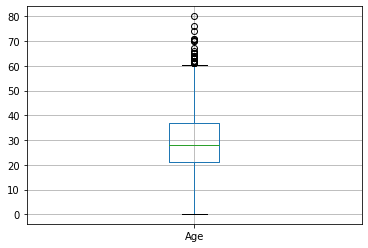

In [56]:
plt.figure()
DF.boxplot(['Age'])

Recapitulando:

In [57]:
def VerEdadXTitulo(titulo):
    medianaDeEdad = np.median(DF[(DF['Title']==titulo) & (DF["Age"].notnull())]['Age'])
    conEdad = len(DF[(DF['Title']==titulo) & (DF["Age"].notnull())]['Age'])
    sinEdad = len(DF[(DF['Title']==titulo) & (DF["Age"].isna())])
    
    print(f"La mediana de edad de los {conEdad} {titulo} con Age es de {medianaDeEdad}. Faltan: {sinEdad} ")
    
for titulo in (pd.unique(DF.Title)):
    VerEdadXTitulo(titulo)

La mediana de edad de los 727 Mr con Age es de 28.0. Faltan: 0 
La mediana de edad de los 192 Mrs con Age es de 34.82591139706831. Faltan: 0 
La mediana de edad de los 202 Miss con Age es de 22.0. Faltan: 0 
La mediana de edad de los 66 Master con Age es de 6.0. Faltan: 0 
La mediana de edad de los 62 Girl con Age es de 5.0. Faltan: 0 
La mediana de edad de los 6 Arist con Age es de 39.5. Faltan: 0 
La mediana de edad de los 25 MrSenior con Age es de 64.0. Faltan: 0 
La mediana de edad de los 8 Rev con Age es de 41.5. Faltan: 0 
La mediana de edad de los 8 Dr con Age es de 49.0. Faltan: 0 
La mediana de edad de los 7 Army con Age es de 53.0. Faltan: 0 
La mediana de edad de los 6 MrSSenior con Age es de 63.5. Faltan: 0 


<div id='id27'/> 

### [2.7 Fare](#id00)

Hemos podido observar que hay un grupo de personas que no pagan el billete y que en la variable Ticket aparece la anotación LINE. En general son hombres que viajan solos y embarcaron en el puerto de Southamton y que en su mayoria murieron (al margen de la clase en que viajaran). Se podría deducir de ello que se trata de personas con alguna relacion especial con la compañía propietaria del barco. Se opta por identficarles como Empleados en la variable Title. 

In [58]:
DF[DF["Fare"]<1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
179,180,0.0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,NaN,S,Mr,0
263,264,0.0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B94,S,Mr,0
271,272,1.0,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,NaN,S,Mr,0
277,278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,34.492768,0,0,239853,0.0,NaN,S,Mr,0
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,NaN,S,Mr,0
413,414,0.0,2,"Cunningham, Mr. Alfred Fleming",male,34.492768,0,0,239853,0.0,NaN,S,Mr,0
466,467,0.0,2,"Campbell, Mr. William",male,34.492768,0,0,239853,0.0,NaN,S,Mr,0
481,482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,34.492768,0,0,239854,0.0,NaN,S,Mr,0
597,598,0.0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,NaN,S,Mr,0
633,634,0.0,1,"Parr, Mr. William Henry Marsh",male,40.919701,0,0,112052,0.0,NaN,S,Mr,0


In [59]:
DF.loc[(DF["Fare"]<1), "Title" ] = 'Empleados'

Adicionalmente, para no distorsionar la variable *Fare* se decide asignarles,en este caso, el valor de la media de la variable *Fare* según la clase a la que pertenezcan. 

In [60]:
DF.loc[(DF["Fare"]<1)&(DF["Pclass"]==1), "Fare" ] = np.mean(DF[(DF["Pclass"]==1)]["Fare"])
DF.loc[(DF["Fare"]<1)&(DF["Pclass"]==2), "Fare" ] = np.mean(DF[(DF["Pclass"]==2)]["Fare"])
DF.loc[(DF["Fare"]<1)&(DF["Pclass"]==3), "Fare" ] = np.mean(DF[(DF["Pclass"]==3)]["Fare"])
#DF[DF["Title"]=="Empleados"]

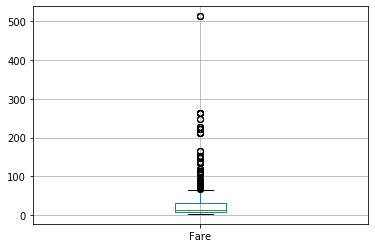

In [61]:
plt.figure()
DF.boxplot(['Fare'])

Una vez eliminado el precio ilógico de 0, vemos que hay un outlayer entre los precios altos, lo analizamos y lo justamos a los siguientes precios más elevados para evitar que se distorsione el analisis general de este dato

In [62]:
DF[(DF["Fare"] == max(DF["Fare"]))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss,0
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr,1
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr,0
1234,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mrs,1


In [63]:
#The next tarife after 512 is:
DF[(DF["Fare"]== max(DF[DF["Fare"] != max(DF["Fare"])]["Fare"]))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,Mr,5
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S,Miss,5
341,342,1.0,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S,Miss,5
438,439,0.0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,MrSenior,5
944,945,NaN,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0,C23 C25 C27,S,Miss,5
960,961,NaN,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0,C23 C25 C27,S,Mrs,5


In [64]:
DF.loc[(DF["Fare"] == max(DF["Fare"])), "Fare" ] =  263
max(DF["Fare"])

263.0

En un siguiente paso categorizamos los precios para facilitar la posterior creacion de modelos de prediccion.

In [65]:
DF['precio'] = pd.qcut(DF["Fare"], 10, labels=["1","2","3","4","5","6","7","8","9","10"])

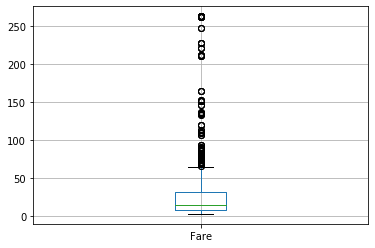

In [66]:
plt.figure()
DF.boxplot(['Fare'])

<div id='id28'/> 

### [3.8 Ticket](#id00)

In [67]:
len(DF[DF["Ticket"].isna()])

0

Al intentar analizar los Tickets en detalle vemos que se trata de un dato muy confuso que en algunos casos es numérico y en otros es alfanumérico, para unificar el criterio de forma simple, recogemos solo los numeros finales ignorando las letras iniciales. Posteriormente, si finalmente decidimos que este aspecto es relevante podría ser interesante volver a este apartado para recoger también las letras.

In [68]:
#Puesto que la mayoria no tienen letras recuperamos solo el ultimo numero.

billetes = []
for ticket in DF["Ticket"]:
    billetes.append(ticket.split()[-1])
    
len(billetes)


1309

In [69]:
DF['billete'] = billetes
DF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,precio,billete
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,21171
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,9,17599
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,3,3101282
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,9,113803
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,3,373450


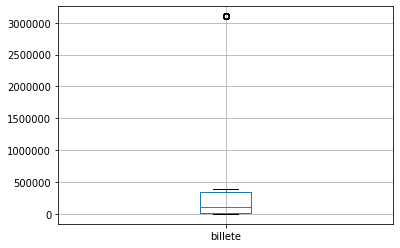

In [70]:
DF.loc[(DF['billete']=='LINE'), "billete" ] = '99999'
DF['billete'] = DF['billete'].astype(int)
plt.figure()
DF.boxplot(['billete'])

Corregimos los valores extremos dandoles un valor cercano al siguiente valor máximo

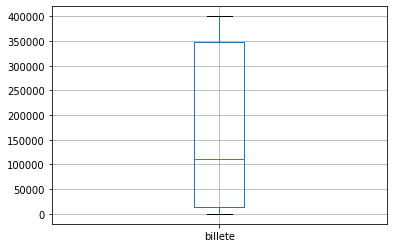

In [71]:
DF.loc[(DF['billete']>400000), "billete" ] = 400000
plt.figure()
DF.boxplot(['billete'])

In [72]:
max(DF.billete)

400000

In [73]:
min(DF.billete)

2

In [74]:
np.mean(DF.billete)

159559.19022154316

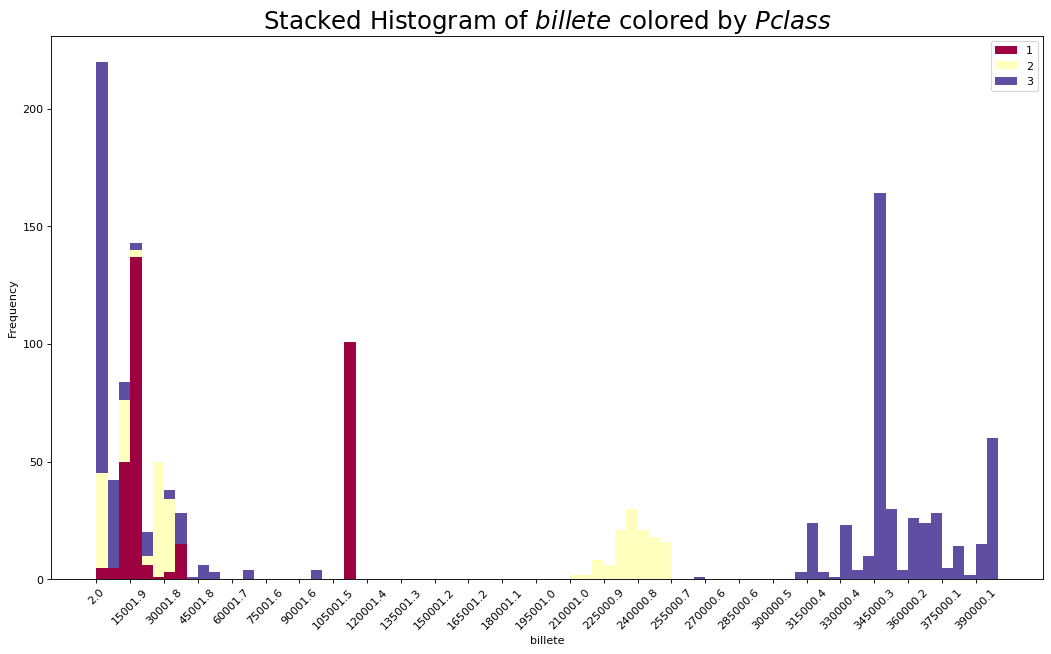

In [75]:
# Prepare DF
x_var = 'billete'
groupby_var = 'Pclass'
df_agg = DF.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [DF[x_var].values.tolist() for i, DF in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 80, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(DF[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")

plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.xticks(rotation=45)
plt.show()

A partir de esta representacion visual, vemos que el número de billlete tiene claramente alguna relación con la clase, especialmente a partir del billete número 40000 aproximadamente.

Siguiendo esta apreciación visual categorizamos la variable *billete* en 5 grupos:

In [76]:
  
DF['billete'] = DF['billete'].astype(int)
DF.loc[ DF['billete'] <= 40000, 'billete'] = 1
DF.loc[(DF['billete'] > 40000) & (DF['billete'] <= 104000), 'billete'] = 2
DF.loc[(DF['billete'] > 104000) & (DF['billete'] <= 170000), 'billete'] = 3
DF.loc[(DF['billete'] > 170000) & (DF['billete'] <= 252000), 'billete'] = 4
DF.loc[ DF['billete'] > 252000, 'billete'] = 5

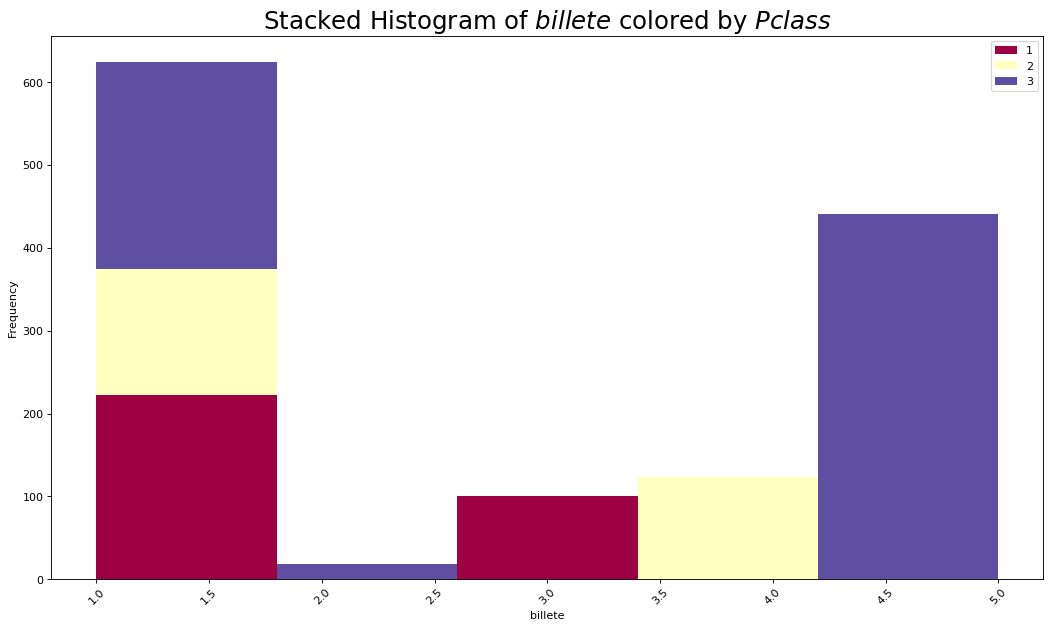

In [77]:
# Prepare DF
x_var = 'billete'
groupby_var = 'Pclass'
df_agg = DF.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [DF[x_var].values.tolist() for i, DF in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 5, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(DF[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")

#plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.xticks(rotation=45)
plt.show()

<div id='id29'/> 

### [2.9 Cabin](#id00)

In [78]:
len(DF[DF["Cabin"].isna()])


1014

Suponiendo que las letras hacen referencia a las distintas cubiertas del barco y considerando este hecho un factor primordial un la supervivencia, recogemos estos datos y rellenamos los desconocidos con la letra U de Unknown.

In [79]:
#rellenamos los vacios con un codigo:
for l in DF['Cabin']:
    DF['Cabin'] = DF['Cabin'].fillna("U0")
len(DF[DF["Cabin"].isna()])

0

In [80]:
pd.unique(DF["Cabin"])

array(['U0', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64'

A partir de estas letras, creamos una clasificación numérica para facilitar su analisis.

In [81]:
planta = []
letras = []    
planta.append(DF['Cabin'])
for letra in planta[0]:
    if letra[0]== "A":
        letras.append(1)
    elif letra[0]== "B":
        letras.append(2)  
    elif letra[0]== "C":
        letras.append(3)
    elif letra[0]== "D":
        letras.append(4)
    elif letra[0]== "E":
        letras.append(5)
    elif letra[0]== "F":
        letras.append(6)
    elif letra[0]== "G":
        letras.append(7)
    else:
        letras.append(8)
        

len(letras)

1309

In [82]:
DF['Planta'] = letras
pd.unique(DF['Planta'])

array([8, 3, 5, 7, 4, 1, 2, 6], dtype=int64)

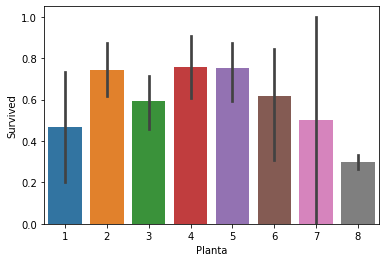

In [83]:
Prueba = DF[DF.Survived.notnull()]
sns.barplot(x='Planta', y='Survived', data=Prueba)

<div id='id210'/> 

### [2.10 Embarked](#id00)

La variable *Embarked* tan sólo tiene dos valores perdidos. Vamos a tratar darle un valor a estos dos registros a partir de los
de la variable *Fare*.

In [84]:
len(DF[DF["Embarked"].isna()])

2

In [85]:
DF[DF["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,precio,billete,Planta
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,0,10,3,2
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,MrSSenior,0,10,3,2


In [86]:
DF["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

Puesto que no hay rasgos que nos indiquen el lugar de embarque, elegimos el puerto donde subieron la mayoria de personas

In [87]:
DF.loc[( DF["Embarked"].isna()), "Embarked" ] = 'S'
DF[DF["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,precio,billete,Planta


<div id='id3'/>

# [3. Análisis de los datos y conclusiones](#id00)

Para finalizar la limpieza y preparación de nuestro *dateset* realizamos unos últimos ajustes:

In [88]:
DF2=DF
len(DF2)

1309

Antes de probar modelos, para evitar el sobre entrenamiento, ahora que ya conocemos los datos seleccionados, seleccionamos los apartados que nos parecen más relevantes y eliminamos los que aportan menos informacion.


In [89]:
DF2=DF2.drop('PassengerId', axis=1) # Esta informacion es irrelevante
DF2=DF2.drop('Name', axis=1) # La informacion mas relevante ya esta en Title
DF2=DF2.drop('SibSp', axis=1) # Esta informacion ya esta en Family
DF2=DF2.drop('Parch', axis=1) # Esta informacion ya esta en Family
DF2=DF2.drop('Ticket', axis=1) # Esta informacion ya esta en billete
DF2=DF2.drop('Cabin', axis=1) # Esta informacion ya esta en Planta
DF2=DF2.drop('Fare', axis=1) # Esta informacion ya esta en precio

DF2.head()

,Survived,Pclass,Sex,Age,Embarked,Title,Family,precio,billete,Planta
0,0.0,3,male,22.0,S,Mr,1,1,1,8
1,1.0,1,female,38.0,C,Mrs,1,9,1,3
2,1.0,3,female,26.0,S,Miss,0,3,5,8
3,1.0,1,female,35.0,S,Mrs,1,9,3,3
4,0.0,3,male,35.0,S,Mr,0,3,5,8


In [90]:
DF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
Survived    891 non-null float64
Pclass      1309 non-null int64
Sex         1309 non-null object
Age         1309 non-null float64
Embarked    1309 non-null object
Title       1309 non-null object
Family      1309 non-null int64
precio      1309 non-null category
billete     1309 non-null int32
Planta      1309 non-null int64
dtypes: category(1), float64(2), int32(1), int64(3), object(3)
memory usage: 88.7+ KB


In [91]:
DF2['precio']=DF2['precio'].astype(int)
DF2['Age']=DF2['Age'].astype(int)

Repasamos en primer lugar los datos con los que trabajamos

A continuacion conventimos los datos categoricos en numeros creando dummies cuando sea necesario

In [92]:
Titulos = pd.get_dummies(DF2['Title'], prefix = "Titulo")
DF2 = pd.concat([DF2, Titulos], axis=1)
DF2=DF2.drop('Title', axis=1)
DF2.head()

,Survived,Pclass,Sex,Age,Embarked,Family,precio,billete,Planta,Titulo_Arist,...,Titulo_Dr,Titulo_Empleados,Titulo_Girl,Titulo_Master,Titulo_Miss,Titulo_Mr,Titulo_MrSSenior,Titulo_MrSenior,Titulo_Mrs,Titulo_Rev
0,0.0,3,male,22,S,1,1,1,8,0,...,0,0,0,0,0,1,0,0,0,0
1,1.0,1,female,38,C,1,9,1,3,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,3,female,26,S,0,3,5,8,0,...,0,0,0,0,1,0,0,0,0,0
3,1.0,1,female,35,S,1,9,3,3,0,...,0,0,0,0,0,0,0,0,1,0
4,0.0,3,male,35,S,0,3,5,8,0,...,0,0,0,0,0,1,0,0,0,0


In [93]:
Puerto = pd.get_dummies(DF2['Embarked'], prefix = "Puerto")
DF2 = pd.concat([DF2, Puerto], axis=1)
DF2=DF2.drop('Embarked', axis=1)
DF2.head()

,Survived,Pclass,Sex,Age,Family,precio,billete,Planta,Titulo_Arist,Titulo_Army,...,Titulo_Master,Titulo_Miss,Titulo_Mr,Titulo_MrSSenior,Titulo_MrSenior,Titulo_Mrs,Titulo_Rev,Puerto_C,Puerto_Q,Puerto_S
0,0.0,3,male,22,1,1,1,8,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1.0,1,female,38,1,9,1,3,0,0,...,0,0,0,0,0,1,0,1,0,0
2,1.0,3,female,26,0,3,5,8,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1.0,1,female,35,1,9,3,3,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0.0,3,male,35,0,3,5,8,0,0,...,0,0,1,0,0,0,0,0,0,1


In [94]:
Sexo = pd.get_dummies(DF2['Sex'], prefix = "Sexo")
DF2 = pd.concat([DF2, Sexo], axis=1)
DF2=DF2.drop('Sex', axis=1)
DF2.head()

,Survived,Pclass,Age,Family,precio,billete,Planta,Titulo_Arist,Titulo_Army,Titulo_Dr,...,Titulo_Mr,Titulo_MrSSenior,Titulo_MrSenior,Titulo_Mrs,Titulo_Rev,Puerto_C,Puerto_Q,Puerto_S,Sexo_female,Sexo_male
0,0.0,3,22,1,1,1,8,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,1.0,1,38,1,9,1,3,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,1.0,3,26,0,3,5,8,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1.0,1,35,1,9,3,3,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,0.0,3,35,0,3,5,8,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [95]:
DF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 24 columns):
Survived            891 non-null float64
Pclass              1309 non-null int64
Age                 1309 non-null int32
Family              1309 non-null int64
precio              1309 non-null int32
billete             1309 non-null int32
Planta              1309 non-null int64
Titulo_Arist        1309 non-null uint8
Titulo_Army         1309 non-null uint8
Titulo_Dr           1309 non-null uint8
Titulo_Empleados    1309 non-null uint8
Titulo_Girl         1309 non-null uint8
Titulo_Master       1309 non-null uint8
Titulo_Miss         1309 non-null uint8
Titulo_Mr           1309 non-null uint8
Titulo_MrSSenior    1309 non-null uint8
Titulo_MrSenior     1309 non-null uint8
Titulo_Mrs          1309 non-null uint8
Titulo_Rev          1309 non-null uint8
Puerto_C            1309 non-null uint8
Puerto_Q            1309 non-null uint8
Puerto_S            1309 non-null uint8
Sexo_female 

Una vez finalizada la limpieza y preparación del *dataset* procedemos a separarlo para crear de nuevo los *dataset train* y *test*.

In [96]:
Training = DF2[DF2.Survived.notnull()]
Training.head()

,Survived,Pclass,Age,Family,precio,billete,Planta,Titulo_Arist,Titulo_Army,Titulo_Dr,...,Titulo_Mr,Titulo_MrSSenior,Titulo_MrSenior,Titulo_Mrs,Titulo_Rev,Puerto_C,Puerto_Q,Puerto_S,Sexo_female,Sexo_male
0,0.0,3,22,1,1,1,8,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,1.0,1,38,1,9,1,3,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,1.0,3,26,0,3,5,8,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1.0,1,35,1,9,3,3,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,0.0,3,35,0,3,5,8,0,0,0,...,1,0,0,0,0,0,0,1,0,1


Entre los datos Training (con información del target) creamos dos sets uno X con todos las caracteristicas y otro Y con el target (la supervivencia o no)

In [97]:
X=Training.loc[:, Training.columns != 'Survived']
Y=Training.loc[:, Training.columns == 'Survived']

A su vez, creamos dos *datasets* de subconjuntos de train y test. Uno para el entrenamiento de los modelos (X_train, y_train) y otro para su validacion (X_test, y_test).

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.2)


También creamos un dataset con los datos limpios para hacer la predicción que se mandará a Kaggle al que llamamos XtestFinal

In [99]:
Testing = DF2[DF2.Survived.isnull()]
XtestFinal=Testing.loc[:, Testing.columns != 'Survived']
XtestFinal.head()

,Pclass,Age,Family,precio,billete,Planta,Titulo_Arist,Titulo_Army,Titulo_Dr,Titulo_Empleados,...,Titulo_Mr,Titulo_MrSSenior,Titulo_MrSenior,Titulo_Mrs,Titulo_Rev,Puerto_C,Puerto_Q,Puerto_S,Sexo_female,Sexo_male
891,3,34,0,2,5,8,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
892,3,47,1,1,5,8,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
893,2,62,0,4,4,8,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
894,3,27,0,4,5,8,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
895,3,22,2,5,5,8,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0


#### A continuacion crearemos diversos modelos y comprobaremos su efectividad con la finanalidad de participar en la competición activa en Kaggle: 

  #### 1. Modelos de regresión.
  #### 2. Combinación de modelos regresión.
  #### 3. Modelo de redes neuronal.
  #### 4. Combinación del modelo de red neuronal.

<div id='id31'/>

### [1. Modelos de regresión](#id00)

In [100]:
XtestFinal = Testing.loc[:, Testing.columns != 'Survived']

In [101]:

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Escogemos las funciones con las que queremos generar modelos para predecir la supervivencia
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

# Creamos un vector en el que recogeremos los resultados de la precision de cada metodo en funcion de un proceso de cross validation sobre los datos X_train, y_train 
resultados =[]

# Creamos un df para recoger los resultados de la prediccion final de cada uno de los metodos
submission= pd.DataFrame(data=DF[DF.Survived.isnull()].PassengerId)

models = [logreg, logreg_cv, rf, gboost]

for model in models:
    clf=model
    Crossval = cross_val_score(clf,X_train, y_train.values.ravel(), cv = 5, scoring='accuracy')
    #recogemos la precision de cada una de las 5 cross validation y también la media total.
    resultados.append(Crossval)
    resultados.append(np.mean(Crossval))
    
    # A continuacion, entrenamos el metodo una vez mas, pero ahora con todos los datos para cada uno de los metodos
    # ravel() returns contiguous flattened array
    clf.fit(X, Y.values.ravel())
    
    # A partir del metodo entrenado, se recoge una prediccion a partir de los datos sin taget para entregar, en el df submission
    submission[str(model)] = clf.predict(XtestFinal).astype(int)

# Identificamos cada columna del df con el nombre del metodo de predicción
submission.columns = ['PassengerId','logreg', 'logreg_cv', 'rf', 'gboost']
resultados
    

C:\Users\MARTA\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\MARTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\MARTA\Anaconda3\lib\site-packages\sklea

C:\Users\MARTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\MARTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\MARTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\MARTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\MARTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\MARTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\MARTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\MARTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\MARTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\MARTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\MARTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\MARTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\MARTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\MARTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\MARTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\MARTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\MARTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\MARTA\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

[array([0.63888889, 0.75      , 0.80555556, 0.91428571, 0.82857143]),
 0.7874603174603175,
 array([0.63888889, 0.72222222, 0.77777778, 0.94285714, 0.82857143]),
 0.782063492063492,
 array([0.55555556, 0.66666667, 0.75      , 0.88571429, 0.65714286]),
 0.703015873015873,
 array([0.58333333, 0.66666667, 0.80555556, 0.8       , 0.71428571]),
 0.7139682539682539]

In [102]:
XtestFinal

,Pclass,Age,Family,precio,billete,Planta,Titulo_Arist,Titulo_Army,Titulo_Dr,Titulo_Empleados,...,Titulo_Mr,Titulo_MrSSenior,Titulo_MrSenior,Titulo_Mrs,Titulo_Rev,Puerto_C,Puerto_Q,Puerto_S,Sexo_female,Sexo_male
891,3,34,0,2,5,8,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
892,3,47,1,1,5,8,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
893,2,62,0,4,4,8,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
894,3,27,0,4,5,8,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
895,3,22,2,5,5,8,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,27,0,3,1,8,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1305,1,39,0,10,1,3,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1306,3,38,0,1,5,8,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1307,3,27,0,3,5,8,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


Vemos que en general los resultados son bastante inestables. Por ejemplo, vemos que los resultados del método de Random Forest Classifier oscila entre el 69 y el 94% de aciertos según donde se haya hecho el corte de la cross validation. Aún así, este metodo es el que consigue de media un mayor numero de aciertos, llegando al 80%


In [103]:
submission

,PassengerId,logreg,logreg_cv,rf,gboost
891,892,0,0,0,0
892,893,0,0,0,0
893,894,0,0,0,0
894,895,0,0,0,0
895,896,1,1,1,1
...,...,...,...,...,...
1304,1305,0,0,0,0
1305,1306,1,1,1,1
1306,1307,0,0,0,0
1307,1308,0,0,0,0


A partir de los resultados predichos generados por el metodo Random Forest Classifier creamos un csv para comprobar su grado de acierto en Kaggle

In [104]:
submission_rf= pd.DataFrame(data=DF[DF.Survived.isnull()].PassengerId)
submission_rf['Survived'] =  submission.rf
submission_rf

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0


In [105]:
submission_rf.to_csv("Submision_rf.csv", index=False)

#### Esta prediccion ha conseguido un 0.79425 en Kaggle

<div id='id32'/>

### [2. Combinación de modelos de regresión](#id00)

Aprovechamos para hacer también un combinado de los resultados de los 3 métodos con los mejores resultados

In [106]:
submission['suma_mejores']=(np.round((submission.logreg+submission.logreg_cv + submission.rf)/3)).astype(int) 
submission


,PassengerId,logreg,logreg_cv,rf,gboost,suma_mejores
891,892,0,0,0,0,0
892,893,0,0,0,0,0
893,894,0,0,0,0,0
894,895,0,0,0,0,0
895,896,1,1,1,1,1
...,...,...,...,...,...,...
1304,1305,0,0,0,0,0
1305,1306,1,1,1,1,1
1306,1307,0,0,0,0,0
1307,1308,0,0,0,0,0


In [107]:

submission_suma_mejores= pd.DataFrame(data=DF[DF.Survived.isnull()].PassengerId)
submission_suma_mejores['Survived'] =  submission.suma_mejores
submission_suma_mejores

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0


In [108]:
submission_suma_mejores.to_csv("Submision_suma_mejores1.csv", index=False)

#### Esta predicción ha conseguido un 0.78947 en Kaggle.

<div id='id33'/>

### [3. Modelo de red neuronal](#id00)

A continuacion preparamos los datos para utilizar una red neuronal completamente conectada.

In [109]:
#normalizamos por el max-min scaling para que los numeros dentro del rango [0,1]
DF2 = (DF2 - DF2.min()) / (DF2.max() - DF2.min())
DF2.head()


,Survived,Pclass,Age,Family,precio,billete,Planta,Titulo_Arist,Titulo_Army,Titulo_Dr,...,Titulo_Mr,Titulo_MrSSenior,Titulo_MrSenior,Titulo_Mrs,Titulo_Rev,Puerto_C,Puerto_Q,Puerto_S,Sexo_female,Sexo_male
0,0.0,1.0,0.2750,0.1,0.000000,0.0,1.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.4750,0.1,0.888889,0.0,0.285714,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.3250,0.0,0.222222,1.0,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.4375,0.1,0.888889,0.5,0.285714,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.4375,0.0,0.222222,1.0,1.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [110]:
Training = DF2[DF2.Survived.notnull()]
X=Training.loc[:, Training.columns != 'Survived']
Y=Training.loc[:, Training.columns == 'Survived']

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.2)

Testing = DF2[DF2.Survived.isna()]
XtestFinal = Testing.loc[:, Testing.columns != 'Survived']


In [111]:
X.shape

(891, 23)

In [112]:
# Creación de la red neuronal

from keras.layers import Dense, Dropout, BatchNormalization, Activation

# Modelo
model = Sequential()

# Capa de entrada
model.add(Dense(23, input_shape=(23,)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.4))

# Capas ocultas
model.add(Dense(50))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.4))

model.add(Dense(50, activation="relu"))
    
# Capa de salida con funcion sigmoide que da un numero entre 0 y 1
model.add(Dense(1, activation="sigmoid"))



ModuleNotFoundError: No module named 'keras'

In [195]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# learning
model.fit(X_train, y_train, nb_epoch=400, batch_size=30)

AttributeError: 'GradientBoostingClassifier' object has no attribute 'compile'

In [337]:
#Evaluamos ahora el metodo sobre todos los datos de los que conocemos la respuesta

results = model.evaluate(X, Y, batch_size=30)
results

891/891 [==============================] - 0s 53us/step


[0.47478944675288215, 0.8181818127632141]

Lo hemos hecho correr varias veces hasta conseguir un resultado superior al 81%

Seguimos entrenando el mismo metodo con los datos del test antes de mandarlo a Kaggle

In [338]:
model.fit(X, Y, nb_epoch=400, batch_size=30)

Epoch 1/400
891/891 [==============================] - 0s 213us/step - loss: 0.5056 - accuracy: 0.8081
Epoch 2/400
 30/891 [>.............................] - ETA: 0s - loss: 0.2994 - accuracy: 0.9000

/Users/xaf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


891/891 [==============================] - 0s 200us/step - loss: 0.4534 - accuracy: 0.8171
Epoch 3/400
891/891 [==============================] - 0s 208us/step - loss: 0.4466 - accuracy: 0.8058
Epoch 4/400
891/891 [==============================] - 0s 185us/step - loss: 0.4289 - accuracy: 0.8103
Epoch 5/400
891/891 [==============================] - 0s 191us/step - loss: 0.4271 - accuracy: 0.8092
Epoch 6/400
891/891 [==============================] - 0s 200us/step - loss: 0.4453 - accuracy: 0.8159
Epoch 7/400
891/891 [==============================] - 0s 198us/step - loss: 0.4198 - accuracy: 0.8328
Epoch 8/400
891/891 [==============================] - 0s 187us/step - loss: 0.4213 - accuracy: 0.8204
Epoch 9/400
891/891 [==============================] - 0s 183us/step - loss: 0.4122 - accuracy: 0.8328
Epoch 10/400
891/891 [==============================] - 0s 188us/step - loss: 0.4034 - accuracy: 0.8373
Epoch 11/400
891/891 [==============================] - 0s 193us/step - loss: 0.4210

Epoch 81/400
891/891 [==============================] - 0s 210us/step - loss: 0.3986 - accuracy: 0.8328
Epoch 82/400
891/891 [==============================] - 0s 205us/step - loss: 0.3991 - accuracy: 0.8373
Epoch 83/400
891/891 [==============================] - 0s 225us/step - loss: 0.3965 - accuracy: 0.8395
Epoch 84/400
891/891 [==============================] - 0s 210us/step - loss: 0.3786 - accuracy: 0.8530
Epoch 85/400
891/891 [==============================] - 0s 203us/step - loss: 0.3962 - accuracy: 0.8451
Epoch 86/400
891/891 [==============================] - 0s 203us/step - loss: 0.3913 - accuracy: 0.8384
Epoch 87/400
891/891 [==============================] - 0s 199us/step - loss: 0.3968 - accuracy: 0.8361
Epoch 88/400
891/891 [==============================] - 0s 206us/step - loss: 0.4072 - accuracy: 0.8361
Epoch 89/400
891/891 [==============================] - 0s 201us/step - loss: 0.3937 - accuracy: 0.8429
Epoch 90/400
891/891 [==============================] - 0s 203us

891/891 [==============================] - 0s 217us/step - loss: 0.3850 - accuracy: 0.8462
Epoch 238/400
891/891 [==============================] - 0s 217us/step - loss: 0.3700 - accuracy: 0.8530
Epoch 239/400
891/891 [==============================] - 0s 218us/step - loss: 0.3698 - accuracy: 0.8429
Epoch 240/400
891/891 [==============================] - 0s 218us/step - loss: 0.3792 - accuracy: 0.8474
Epoch 241/400
891/891 [==============================] - 0s 216us/step - loss: 0.3775 - accuracy: 0.8496
Epoch 242/400
891/891 [==============================] - 0s 216us/step - loss: 0.3844 - accuracy: 0.8384
Epoch 243/400
891/891 [==============================] - 0s 220us/step - loss: 0.3733 - accuracy: 0.8328
Epoch 244/400
891/891 [==============================] - 0s 225us/step - loss: 0.3761 - accuracy: 0.8406
Epoch 245/400
891/891 [==============================] - 0s 219us/step - loss: 0.3858 - accuracy: 0.8418
Epoch 246/400
891/891 [==============================] - 0s 218us/ste

891/891 [==============================] - 0s 225us/step - loss: 0.3918 - accuracy: 0.8474
Epoch 394/400
891/891 [==============================] - 0s 218us/step - loss: 0.3696 - accuracy: 0.8530
Epoch 395/400
891/891 [==============================] - 0s 221us/step - loss: 0.3620 - accuracy: 0.8519
Epoch 396/400
891/891 [==============================] - 0s 221us/step - loss: 0.3691 - accuracy: 0.8563
Epoch 397/400
891/891 [==============================] - 0s 220us/step - loss: 0.3731 - accuracy: 0.8440
Epoch 398/400
891/891 [==============================] - 0s 222us/step - loss: 0.3777 - accuracy: 0.8418
Epoch 399/400
891/891 [==============================] - 0s 220us/step - loss: 0.3560 - accuracy: 0.8496
Epoch 400/400
891/891 [==============================] - 0s 218us/step - loss: 0.3564 - accuracy: 0.8485


In [339]:
# creamos un df para la entrega a Kaggle
submission_NN= pd.DataFrame(data=DF[DF.Survived.isnull()].PassengerId)
prediccion = model.predict(XtestFinal)
print(prediccion)

[[0.12488109]
 [0.60282683]
 [0.057751  ]
 [0.10296798]
 [0.6260485 ]
 [0.93414557]
 [0.7289775 ]
 [0.12482855]
 [0.8673719 ]
 [0.11501488]
 [0.10066053]
 [0.14466897]
 [0.9867073 ]
 [0.11535552]
 [0.98650026]
 [0.94336134]
 [0.12392384]
 [0.08911794]
 [0.36351228]
 [0.7644911 ]
 [0.11242425]
 [0.8944812 ]
 [0.9922879 ]
 [0.16551569]
 [0.9332696 ]
 [0.12724793]
 [0.9605608 ]
 [0.08871305]
 [0.3791807 ]
 [0.11114493]
 [0.11511889]
 [0.11396646]
 [0.27894914]
 [0.20730054]
 [0.5922734 ]
 [0.09148276]
 [0.4074753 ]
 [0.36289477]
 [0.10278085]
 [0.5957577 ]
 [0.11009744]
 [0.4662186 ]
 [0.1279121 ]
 [0.86420244]
 [0.98168945]
 [0.09937075]
 [0.4255661 ]
 [0.11559424]
 [0.9234055 ]
 [0.26833117]
 [0.5425145 ]
 [0.08665287]
 [0.9851521 ]
 [0.9942742 ]
 [0.08527699]
 [0.12194505]
 [0.11793986]
 [0.12802944]
 [0.11606157]
 [0.9651036 ]
 [0.09776577]
 [0.10327208]
 [0.09458116]
 [0.7753259 ]
 [0.9801549 ]
 [0.94561666]
 [0.76787585]
 [0.17203715]
 [0.6099683 ]
 [0.93589413]
 [0.73910606]
 [0.09

In [340]:
sobreviven = np.round(prediccion)
arr = np.array(sobreviven)
data=arr.flatten()
submission_NN['Survived']=data
submission_NN['Survived'] = submission_NN['Survived'].astype(int)
submission_NN

,PassengerId,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,1
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0


In [341]:
submission_NN.to_csv("Submision_NN.csv", index=False)

#### Esta prediccion ha conseguido un   0.80382  en Kaggle 

Para tratar de mejorar este resultado se crea una función específica. Esta funcion recoge la precision sobre los datos test en el *dataframe* contador para valorar si añadiendo una capa o aumentando o reduciendo el numero de neuronas y su activacion se pueden mejorar los resultados.

In [367]:
def NN_0(activacion, neurona, capa):
    #print('dentro')
    # Model 
    model = Sequential()
    #input layer
    model.add(Dense(23, input_shape=(23,)))
    model.add(BatchNormalization())
    model.add(Activation(activacion))
    model.add(Dropout(0.4))

    for x in range(capa):
        # hidden layers
        model.add(Dense(neurona))
        model.add(BatchNormalization())
        model.add(Activation(activacion))
        model.add(Dropout(0.4))

    
    model.add(Dense(neurona, activation="relu"))    
           
    # output layer
    model.add(Dense(1, activation="sigmoid"))
    
    # model compile for binary classification

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # learning
    model.fit(X_train, y_train, nb_epoch=400, batch_size=30)
    
    
    result = model.evaluate(X_test, y_test, batch_size=30)

    #LO ENTRENAMOS CON TODOS LOS DATOS PARA SACAR LOS RESULTADOS FINALES
    
    model.fit(X, Y, nb_epoch=400, batch_size=30)
    
    sobreviven = np.round(model.predict(XtestFinal))
    arr = np.array(sobreviven)
    data=arr.flatten()

    
    return result,data

In [368]:
Contador2 = pd.DataFrame()

submission_NN4= pd.DataFrame(data=DF[DF.Survived.isnull()].PassengerId)

Activacion= ["relu",'sigmoid']

Neuronas = [25, 50, 100] #,'300']

Capas = [1, 2] #,4]



for activacion in Activacion:
    for neurona in Neuronas:
        for capa in Capas:
            
            print ('********************************************************************************************************************************************************************************')
            print ('********************************************************************************************************************************************************************************')
            print (str(str(activacion)+', '+ str(neurona)+', '+str(capa)))
            print ('********************************************************************************************************************************************************************************')
            print ('********************************************************************************************************************************************************************************')
         
            result,data = NN_0(activacion, neurona, capa)
            Contador2[str(str(activacion)+', '+ str(neurona)+', '+str(capa))] = result
            submission_NN4[str(str(activacion)+', '+ str(neurona)+', '+str(capa))]=data


********************************************************************************************************************************************************************************
********************************************************************************************************************************************************************************
relu, 25, 1
********************************************************************************************************************************************************************************
********************************************************************************************************************************************************************************


/Users/xaf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/400
178/178 [==============================] - 3s 19ms/step - loss: 0.6838 - accuracy: 0.6180
Epoch 2/400
178/178 [==============================] - 0s 369us/step - loss: 0.6081 - accuracy: 0.6404
Epoch 3/400
178/178 [==============================] - 0s 317us/step - loss: 0.6462 - accuracy: 0.6573
Epoch 4/400
178/178 [==============================] - 0s 277us/step - loss: 0.5959 - accuracy: 0.7135
Epoch 5/400
178/178 [==============================] - 0s 290us/step - loss: 0.5841 - accuracy: 0.6517
Epoch 6/400
178/178 [==============================] - 0s 361us/step - loss: 0.6255 - accuracy: 0.6348
Epoch 7/400
178/178 [==============================] - 0s 239us/step - loss: 0.5928 - accuracy: 0.6966
Epoch 8/400
178/178 [==============================] - 0s 203us/step - loss: 0.6045 - accuracy: 0.6742
Epoch 9/400
178/178 [==============================] - 0s 220us/step - loss: 0.5836 - accuracy: 0.6685
Epoch 10/400
178/178 [==============================] - 0s 193us/step - lo

178/178 [==============================] - 0s 165us/step - loss: 0.3967 - accuracy: 0.8539
Epoch 158/400
178/178 [==============================] - 0s 166us/step - loss: 0.4199 - accuracy: 0.8371
Epoch 159/400
178/178 [==============================] - 0s 249us/step - loss: 0.3499 - accuracy: 0.8652
Epoch 160/400
178/178 [==============================] - 0s 196us/step - loss: 0.3562 - accuracy: 0.8652
Epoch 161/400
178/178 [==============================] - 0s 216us/step - loss: 0.3348 - accuracy: 0.8315
Epoch 162/400
178/178 [==============================] - 0s 159us/step - loss: 0.3552 - accuracy: 0.8483
Epoch 163/400
178/178 [==============================] - 0s 154us/step - loss: 0.3984 - accuracy: 0.8258
Epoch 164/400
178/178 [==============================] - 0s 156us/step - loss: 0.3458 - accuracy: 0.8820
Epoch 165/400
178/178 [==============================] - 0s 178us/step - loss: 0.3711 - accuracy: 0.8427
Epoch 166/400
178/178 [==============================] - 0s 179us/ste

178/178 [==============================] - 0s 169us/step - loss: 0.3287 - accuracy: 0.8708
Epoch 314/400
178/178 [==============================] - 0s 168us/step - loss: 0.3490 - accuracy: 0.8820
Epoch 315/400
178/178 [==============================] - 0s 158us/step - loss: 0.3272 - accuracy: 0.8652
Epoch 316/400
178/178 [==============================] - 0s 151us/step - loss: 0.3420 - accuracy: 0.8876
Epoch 317/400
178/178 [==============================] - 0s 153us/step - loss: 0.3323 - accuracy: 0.8596
Epoch 318/400
178/178 [==============================] - 0s 155us/step - loss: 0.2862 - accuracy: 0.8933
Epoch 319/400
178/178 [==============================] - 0s 155us/step - loss: 0.3182 - accuracy: 0.8820
Epoch 320/400
178/178 [==============================] - 0s 157us/step - loss: 0.3136 - accuracy: 0.8764
Epoch 321/400
178/178 [==============================] - 0s 152us/step - loss: 0.3096 - accuracy: 0.8708
Epoch 322/400
178/178 [==============================] - 0s 194us/ste

/Users/xaf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


891/891 [==============================] - 0s 195us/step - loss: 0.4664 - accuracy: 0.8036
Epoch 3/400
891/891 [==============================] - 0s 183us/step - loss: 0.4501 - accuracy: 0.8002
Epoch 4/400
891/891 [==============================] - 0s 177us/step - loss: 0.4491 - accuracy: 0.8114
Epoch 5/400
891/891 [==============================] - 0s 195us/step - loss: 0.4272 - accuracy: 0.8126
Epoch 6/400
891/891 [==============================] - 0s 217us/step - loss: 0.4235 - accuracy: 0.8159
Epoch 7/400
891/891 [==============================] - 0s 194us/step - loss: 0.4530 - accuracy: 0.7946
Epoch 8/400
891/891 [==============================] - 0s 204us/step - loss: 0.4361 - accuracy: 0.8159
Epoch 9/400
891/891 [==============================] - 0s 179us/step - loss: 0.4288 - accuracy: 0.8182
Epoch 10/400
891/891 [==============================] - 0s 185us/step - loss: 0.4232 - accuracy: 0.8272
Epoch 11/400
891/891 [==============================] - 0s 153us/step - loss: 0.4323

Epoch 81/400
891/891 [==============================] - 0s 163us/step - loss: 0.4136 - accuracy: 0.8249
Epoch 82/400
891/891 [==============================] - 0s 206us/step - loss: 0.4023 - accuracy: 0.8260
Epoch 83/400
891/891 [==============================] - 0s 152us/step - loss: 0.4021 - accuracy: 0.8328
Epoch 84/400
891/891 [==============================] - 0s 192us/step - loss: 0.3967 - accuracy: 0.8384
Epoch 85/400
891/891 [==============================] - 0s 155us/step - loss: 0.3960 - accuracy: 0.8373
Epoch 86/400
891/891 [==============================] - 0s 171us/step - loss: 0.3950 - accuracy: 0.8485
Epoch 87/400
891/891 [==============================] - 0s 156us/step - loss: 0.3957 - accuracy: 0.8406
Epoch 88/400
891/891 [==============================] - 0s 151us/step - loss: 0.4143 - accuracy: 0.8305
Epoch 89/400
891/891 [==============================] - 0s 150us/step - loss: 0.3981 - accuracy: 0.8429
Epoch 90/400
891/891 [==============================] - 0s 175us

891/891 [==============================] - 0s 157us/step - loss: 0.3876 - accuracy: 0.8519
Epoch 238/400
891/891 [==============================] - 0s 170us/step - loss: 0.3731 - accuracy: 0.8462
Epoch 239/400
891/891 [==============================] - 0s 153us/step - loss: 0.3862 - accuracy: 0.8384
Epoch 240/400
891/891 [==============================] - 0s 156us/step - loss: 0.3876 - accuracy: 0.8350
Epoch 241/400
891/891 [==============================] - 0s 161us/step - loss: 0.3907 - accuracy: 0.8350
Epoch 242/400
891/891 [==============================] - 0s 169us/step - loss: 0.3645 - accuracy: 0.8575
Epoch 243/400
891/891 [==============================] - 0s 158us/step - loss: 0.3700 - accuracy: 0.8496
Epoch 244/400
891/891 [==============================] - 0s 152us/step - loss: 0.3786 - accuracy: 0.8451
Epoch 245/400
891/891 [==============================] - 0s 154us/step - loss: 0.3852 - accuracy: 0.8384
Epoch 246/400
891/891 [==============================] - 0s 157us/ste

891/891 [==============================] - 0s 152us/step - loss: 0.3688 - accuracy: 0.8541
Epoch 394/400
891/891 [==============================] - 0s 150us/step - loss: 0.3730 - accuracy: 0.8339
Epoch 395/400
891/891 [==============================] - 0s 151us/step - loss: 0.3923 - accuracy: 0.8373
Epoch 396/400
891/891 [==============================] - 0s 150us/step - loss: 0.3885 - accuracy: 0.8283
Epoch 397/400
891/891 [==============================] - 0s 149us/step - loss: 0.3658 - accuracy: 0.8608
Epoch 398/400
891/891 [==============================] - 0s 152us/step - loss: 0.3624 - accuracy: 0.8552
Epoch 399/400
891/891 [==============================] - 0s 157us/step - loss: 0.3647 - accuracy: 0.8496
Epoch 400/400
891/891 [==============================] - 0s 150us/step - loss: 0.3663 - accuracy: 0.8429
******************************************************************************************************************************************************************************

/Users/xaf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/400
178/178 [==============================] - 4s 22ms/step - loss: 0.7441 - accuracy: 0.6685
Epoch 2/400
178/178 [==============================] - 0s 195us/step - loss: 0.7042 - accuracy: 0.6236
Epoch 3/400
178/178 [==============================] - 0s 220us/step - loss: 0.7733 - accuracy: 0.6629
Epoch 4/400
178/178 [==============================] - 0s 210us/step - loss: 0.7066 - accuracy: 0.6292
Epoch 5/400
178/178 [==============================] - 0s 214us/step - loss: 0.6714 - accuracy: 0.6854
Epoch 6/400
178/178 [==============================] - 0s 201us/step - loss: 0.6334 - accuracy: 0.6854
Epoch 7/400
178/178 [==============================] - 0s 209us/step - loss: 0.6582 - accuracy: 0.6517
Epoch 8/400
178/178 [==============================] - 0s 204us/step - loss: 0.6980 - accuracy: 0.6348
Epoch 9/400
178/178 [==============================] - 0s 210us/step - loss: 0.6065 - accuracy: 0.6966
Epoch 10/400
178/178 [==============================] - 0s 206us/step - lo

178/178 [==============================] - 0s 193us/step - loss: 0.3819 - accuracy: 0.8427
Epoch 158/400
178/178 [==============================] - 0s 249us/step - loss: 0.4069 - accuracy: 0.8258
Epoch 159/400
178/178 [==============================] - 0s 253us/step - loss: 0.4261 - accuracy: 0.8146
Epoch 160/400
178/178 [==============================] - 0s 204us/step - loss: 0.4265 - accuracy: 0.8371
Epoch 161/400
178/178 [==============================] - 0s 194us/step - loss: 0.4579 - accuracy: 0.7978
Epoch 162/400
178/178 [==============================] - 0s 195us/step - loss: 0.4056 - accuracy: 0.8202
Epoch 163/400
178/178 [==============================] - 0s 197us/step - loss: 0.3636 - accuracy: 0.8146
Epoch 164/400
178/178 [==============================] - 0s 196us/step - loss: 0.4131 - accuracy: 0.8034
Epoch 165/400
178/178 [==============================] - 0s 196us/step - loss: 0.4302 - accuracy: 0.8034
Epoch 166/400
178/178 [==============================] - 0s 197us/ste

178/178 [==============================] - 0s 268us/step - loss: 0.3838 - accuracy: 0.8258
Epoch 314/400
178/178 [==============================] - 0s 246us/step - loss: 0.3907 - accuracy: 0.8371
Epoch 315/400
178/178 [==============================] - 0s 214us/step - loss: 0.3406 - accuracy: 0.8427
Epoch 316/400
178/178 [==============================] - 0s 204us/step - loss: 0.3527 - accuracy: 0.8596
Epoch 317/400
178/178 [==============================] - 0s 206us/step - loss: 0.3485 - accuracy: 0.8652
Epoch 318/400
178/178 [==============================] - 0s 207us/step - loss: 0.3284 - accuracy: 0.8876
Epoch 319/400
178/178 [==============================] - 0s 212us/step - loss: 0.3754 - accuracy: 0.8034
Epoch 320/400
178/178 [==============================] - 0s 259us/step - loss: 0.3171 - accuracy: 0.8652
Epoch 321/400
178/178 [==============================] - 0s 285us/step - loss: 0.3436 - accuracy: 0.8764
Epoch 322/400
178/178 [==============================] - 0s 428us/ste

/Users/xaf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


891/891 [==============================] - 0s 191us/step - loss: 0.4657 - accuracy: 0.7991
Epoch 3/400
891/891 [==============================] - 0s 198us/step - loss: 0.4913 - accuracy: 0.7868
Epoch 4/400
891/891 [==============================] - 0s 204us/step - loss: 0.4561 - accuracy: 0.8036
Epoch 5/400
891/891 [==============================] - 0s 200us/step - loss: 0.4491 - accuracy: 0.8114
Epoch 6/400
891/891 [==============================] - 0s 193us/step - loss: 0.4437 - accuracy: 0.8137
Epoch 7/400
891/891 [==============================] - 0s 213us/step - loss: 0.4171 - accuracy: 0.8227
Epoch 8/400
891/891 [==============================] - 0s 197us/step - loss: 0.4255 - accuracy: 0.8316
Epoch 9/400
891/891 [==============================] - 0s 187us/step - loss: 0.4252 - accuracy: 0.8215
Epoch 10/400
891/891 [==============================] - 0s 197us/step - loss: 0.4555 - accuracy: 0.7935
Epoch 11/400
891/891 [==============================] - 0s 197us/step - loss: 0.4238

Epoch 81/400
891/891 [==============================] - 0s 199us/step - loss: 0.3946 - accuracy: 0.8429
Epoch 82/400
891/891 [==============================] - 0s 198us/step - loss: 0.4219 - accuracy: 0.8193
Epoch 83/400
891/891 [==============================] - 0s 209us/step - loss: 0.4037 - accuracy: 0.8272
Epoch 84/400
891/891 [==============================] - 0s 196us/step - loss: 0.4011 - accuracy: 0.8429
Epoch 85/400
891/891 [==============================] - 0s 225us/step - loss: 0.4062 - accuracy: 0.8294
Epoch 86/400
891/891 [==============================] - 0s 202us/step - loss: 0.3994 - accuracy: 0.8418
Epoch 87/400
891/891 [==============================] - 0s 198us/step - loss: 0.4084 - accuracy: 0.8350
Epoch 88/400
891/891 [==============================] - 0s 212us/step - loss: 0.3949 - accuracy: 0.8429
Epoch 89/400
891/891 [==============================] - 0s 208us/step - loss: 0.4098 - accuracy: 0.8339
Epoch 90/400
891/891 [==============================] - 0s 191us

891/891 [==============================] - 0s 230us/step - loss: 0.4051 - accuracy: 0.8272
Epoch 238/400
891/891 [==============================] - 0s 233us/step - loss: 0.3862 - accuracy: 0.8350
Epoch 239/400
891/891 [==============================] - 0s 227us/step - loss: 0.3885 - accuracy: 0.8316
Epoch 240/400
891/891 [==============================] - 0s 227us/step - loss: 0.3865 - accuracy: 0.8373
Epoch 241/400
891/891 [==============================] - 0s 215us/step - loss: 0.3809 - accuracy: 0.8451
Epoch 242/400
891/891 [==============================] - 0s 216us/step - loss: 0.3867 - accuracy: 0.8384
Epoch 243/400
891/891 [==============================] - 0s 219us/step - loss: 0.3793 - accuracy: 0.8586
Epoch 244/400
891/891 [==============================] - 0s 212us/step - loss: 0.4034 - accuracy: 0.8316
Epoch 245/400
891/891 [==============================] - 0s 215us/step - loss: 0.3983 - accuracy: 0.8316
Epoch 246/400
891/891 [==============================] - 0s 219us/ste

891/891 [==============================] - 0s 213us/step - loss: 0.3862 - accuracy: 0.8418
Epoch 394/400
891/891 [==============================] - 0s 234us/step - loss: 0.3871 - accuracy: 0.8384
Epoch 395/400
891/891 [==============================] - 0s 198us/step - loss: 0.3843 - accuracy: 0.8384
Epoch 396/400
891/891 [==============================] - 0s 218us/step - loss: 0.3724 - accuracy: 0.8496
Epoch 397/400
891/891 [==============================] - 0s 242us/step - loss: 0.3952 - accuracy: 0.8406
Epoch 398/400
891/891 [==============================] - 0s 199us/step - loss: 0.3795 - accuracy: 0.8485
Epoch 399/400
891/891 [==============================] - 0s 201us/step - loss: 0.3771 - accuracy: 0.8530
Epoch 400/400
891/891 [==============================] - 0s 201us/step - loss: 0.3737 - accuracy: 0.8530
******************************************************************************************************************************************************************************

/Users/xaf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/400
178/178 [==============================] - 3s 15ms/step - loss: 0.6986 - accuracy: 0.5843
Epoch 2/400
178/178 [==============================] - 0s 243us/step - loss: 0.6569 - accuracy: 0.6742
Epoch 3/400
178/178 [==============================] - 0s 281us/step - loss: 0.6594 - accuracy: 0.6629
Epoch 4/400
178/178 [==============================] - 0s 214us/step - loss: 0.6064 - accuracy: 0.7303
Epoch 5/400
178/178 [==============================] - 0s 218us/step - loss: 0.5768 - accuracy: 0.6966
Epoch 6/400
178/178 [==============================] - 0s 216us/step - loss: 0.5693 - accuracy: 0.7079
Epoch 7/400
178/178 [==============================] - 0s 205us/step - loss: 0.6102 - accuracy: 0.6854
Epoch 8/400
178/178 [==============================] - 0s 209us/step - loss: 0.5430 - accuracy: 0.7528
Epoch 9/400
178/178 [==============================] - 0s 208us/step - loss: 0.5532 - accuracy: 0.7303
Epoch 10/400
178/178 [==============================] - 0s 233us/step - lo

178/178 [==============================] - 0s 226us/step - loss: 0.3780 - accuracy: 0.8258
Epoch 158/400
178/178 [==============================] - 0s 221us/step - loss: 0.3716 - accuracy: 0.8483
Epoch 159/400
178/178 [==============================] - 0s 218us/step - loss: 0.3476 - accuracy: 0.8539
Epoch 160/400
178/178 [==============================] - 0s 218us/step - loss: 0.3646 - accuracy: 0.8371
Epoch 161/400
178/178 [==============================] - 0s 221us/step - loss: 0.4005 - accuracy: 0.8315
Epoch 162/400
178/178 [==============================] - 0s 231us/step - loss: 0.3761 - accuracy: 0.8539
Epoch 163/400
178/178 [==============================] - 0s 228us/step - loss: 0.3632 - accuracy: 0.8146
Epoch 164/400
178/178 [==============================] - 0s 231us/step - loss: 0.3670 - accuracy: 0.8315
Epoch 165/400
178/178 [==============================] - 0s 229us/step - loss: 0.3458 - accuracy: 0.8652
Epoch 166/400
178/178 [==============================] - 0s 222us/ste

178/178 [==============================] - 0s 229us/step - loss: 0.2823 - accuracy: 0.9101
Epoch 314/400
178/178 [==============================] - 0s 230us/step - loss: 0.3335 - accuracy: 0.8427
Epoch 315/400
178/178 [==============================] - 0s 226us/step - loss: 0.3063 - accuracy: 0.8652
Epoch 316/400
178/178 [==============================] - 0s 228us/step - loss: 0.3173 - accuracy: 0.8539
Epoch 317/400
178/178 [==============================] - 0s 225us/step - loss: 0.2816 - accuracy: 0.8596
Epoch 318/400
178/178 [==============================] - 0s 227us/step - loss: 0.3331 - accuracy: 0.8652
Epoch 319/400
178/178 [==============================] - 0s 227us/step - loss: 0.2702 - accuracy: 0.8989
Epoch 320/400
178/178 [==============================] - 0s 227us/step - loss: 0.2612 - accuracy: 0.8876
Epoch 321/400
178/178 [==============================] - 0s 227us/step - loss: 0.3019 - accuracy: 0.8764
Epoch 322/400
178/178 [==============================] - 0s 228us/ste

/Users/xaf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


891/891 [==============================] - 0s 231us/step - loss: 0.5237 - accuracy: 0.7946
Epoch 2/400
891/891 [==============================] - 0s 224us/step - loss: 0.4685 - accuracy: 0.8002
Epoch 3/400
891/891 [==============================] - 0s 223us/step - loss: 0.4438 - accuracy: 0.8047
Epoch 4/400
891/891 [==============================] - 0s 228us/step - loss: 0.4535 - accuracy: 0.7980
Epoch 5/400
891/891 [==============================] - 0s 223us/step - loss: 0.4340 - accuracy: 0.8260
Epoch 6/400
891/891 [==============================] - 0s 218us/step - loss: 0.4420 - accuracy: 0.8092
Epoch 7/400
891/891 [==============================] - 0s 216us/step - loss: 0.4461 - accuracy: 0.8126
Epoch 8/400
891/891 [==============================] - 0s 216us/step - loss: 0.4496 - accuracy: 0.8159
Epoch 9/400
891/891 [==============================] - 0s 220us/step - loss: 0.4212 - accuracy: 0.8238
Epoch 10/400
891/891 [==============================] - 0s 219us/step - loss: 0.4486 

Epoch 80/400
891/891 [==============================] - 0s 218us/step - loss: 0.3902 - accuracy: 0.8361
Epoch 81/400
891/891 [==============================] - 0s 221us/step - loss: 0.3976 - accuracy: 0.8485
Epoch 82/400
891/891 [==============================] - 0s 223us/step - loss: 0.4144 - accuracy: 0.8294
Epoch 83/400
891/891 [==============================] - 0s 222us/step - loss: 0.3990 - accuracy: 0.8283
Epoch 84/400
891/891 [==============================] - 0s 231us/step - loss: 0.4013 - accuracy: 0.8294
Epoch 85/400
891/891 [==============================] - 0s 222us/step - loss: 0.3852 - accuracy: 0.8384
Epoch 86/400
891/891 [==============================] - 0s 223us/step - loss: 0.3977 - accuracy: 0.8418
Epoch 87/400
891/891 [==============================] - 0s 221us/step - loss: 0.4020 - accuracy: 0.8305
Epoch 88/400
891/891 [==============================] - 0s 220us/step - loss: 0.3838 - accuracy: 0.8384
Epoch 89/400
891/891 [==============================] - 0s 229us

891/891 [==============================] - 0s 238us/step - loss: 0.3930 - accuracy: 0.8339
Epoch 237/400
891/891 [==============================] - 0s 238us/step - loss: 0.3828 - accuracy: 0.8507
Epoch 238/400
891/891 [==============================] - 0s 243us/step - loss: 0.3682 - accuracy: 0.8541
Epoch 239/400
891/891 [==============================] - 0s 236us/step - loss: 0.3728 - accuracy: 0.8418
Epoch 240/400
891/891 [==============================] - 0s 233us/step - loss: 0.3783 - accuracy: 0.8507
Epoch 241/400
891/891 [==============================] - 0s 230us/step - loss: 0.3819 - accuracy: 0.8440
Epoch 242/400
891/891 [==============================] - 0s 232us/step - loss: 0.3811 - accuracy: 0.8429
Epoch 243/400
891/891 [==============================] - 0s 243us/step - loss: 0.3812 - accuracy: 0.8418
Epoch 244/400
891/891 [==============================] - 0s 238us/step - loss: 0.3865 - accuracy: 0.8361
Epoch 245/400
891/891 [==============================] - 0s 246us/ste

891/891 [==============================] - 0s 239us/step - loss: 0.3815 - accuracy: 0.8530
Epoch 393/400
891/891 [==============================] - 0s 232us/step - loss: 0.3654 - accuracy: 0.8451
Epoch 394/400
891/891 [==============================] - 0s 238us/step - loss: 0.3797 - accuracy: 0.8440
Epoch 395/400
891/891 [==============================] - 0s 230us/step - loss: 0.3863 - accuracy: 0.8384
Epoch 396/400
891/891 [==============================] - 0s 263us/step - loss: 0.3773 - accuracy: 0.8451
Epoch 397/400
891/891 [==============================] - 0s 244us/step - loss: 0.3731 - accuracy: 0.8418
Epoch 398/400
891/891 [==============================] - 0s 232us/step - loss: 0.3821 - accuracy: 0.8395
Epoch 399/400
891/891 [==============================] - 0s 236us/step - loss: 0.3662 - accuracy: 0.8530
Epoch 400/400
891/891 [==============================] - 0s 249us/step - loss: 0.3606 - accuracy: 0.8642
*********************************************************************

/Users/xaf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/400
178/178 [==============================] - 3s 19ms/step - loss: 0.7859 - accuracy: 0.4607
Epoch 2/400
178/178 [==============================] - 0s 287us/step - loss: 0.7007 - accuracy: 0.5506
Epoch 3/400
178/178 [==============================] - 0s 280us/step - loss: 0.6539 - accuracy: 0.6292
Epoch 4/400
178/178 [==============================] - 0s 267us/step - loss: 0.6539 - accuracy: 0.6685
Epoch 5/400
178/178 [==============================] - 0s 287us/step - loss: 0.6009 - accuracy: 0.6742
Epoch 6/400
178/178 [==============================] - 0s 278us/step - loss: 0.5931 - accuracy: 0.6854
Epoch 7/400
178/178 [==============================] - 0s 300us/step - loss: 0.6240 - accuracy: 0.7079
Epoch 8/400
178/178 [==============================] - 0s 283us/step - loss: 0.6100 - accuracy: 0.6573
Epoch 9/400
178/178 [==============================] - 0s 280us/step - loss: 0.5774 - accuracy: 0.6854
Epoch 10/400
178/178 [==============================] - 0s 275us/step - lo

178/178 [==============================] - 0s 312us/step - loss: 0.3553 - accuracy: 0.8483
Epoch 158/400
178/178 [==============================] - 0s 316us/step - loss: 0.3636 - accuracy: 0.8427
Epoch 159/400
178/178 [==============================] - 0s 311us/step - loss: 0.4221 - accuracy: 0.8034
Epoch 160/400
178/178 [==============================] - 0s 313us/step - loss: 0.3920 - accuracy: 0.8483
Epoch 161/400
178/178 [==============================] - 0s 313us/step - loss: 0.4082 - accuracy: 0.8371
Epoch 162/400
178/178 [==============================] - 0s 307us/step - loss: 0.3780 - accuracy: 0.8539
Epoch 163/400
178/178 [==============================] - 0s 302us/step - loss: 0.4138 - accuracy: 0.8202
Epoch 164/400
178/178 [==============================] - 0s 300us/step - loss: 0.3694 - accuracy: 0.8315
Epoch 165/400
178/178 [==============================] - 0s 302us/step - loss: 0.3940 - accuracy: 0.8652
Epoch 166/400
178/178 [==============================] - 0s 303us/ste

178/178 [==============================] - 0s 294us/step - loss: 0.4157 - accuracy: 0.8258
Epoch 314/400
178/178 [==============================] - 0s 293us/step - loss: 0.3955 - accuracy: 0.8090
Epoch 315/400
178/178 [==============================] - 0s 298us/step - loss: 0.3191 - accuracy: 0.8820
Epoch 316/400
178/178 [==============================] - 0s 287us/step - loss: 0.3321 - accuracy: 0.8876
Epoch 317/400
178/178 [==============================] - 0s 295us/step - loss: 0.3616 - accuracy: 0.8652
Epoch 318/400
178/178 [==============================] - 0s 297us/step - loss: 0.2959 - accuracy: 0.8652
Epoch 319/400
178/178 [==============================] - 0s 293us/step - loss: 0.3225 - accuracy: 0.8596
Epoch 320/400
178/178 [==============================] - 0s 299us/step - loss: 0.3514 - accuracy: 0.8708
Epoch 321/400
178/178 [==============================] - 0s 294us/step - loss: 0.3660 - accuracy: 0.8820
Epoch 322/400
178/178 [==============================] - 0s 295us/ste

/Users/xaf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


891/891 [==============================] - 0s 352us/step - loss: 0.5048 - accuracy: 0.8002
Epoch 2/400
891/891 [==============================] - 0s 320us/step - loss: 0.4595 - accuracy: 0.7969
Epoch 3/400
891/891 [==============================] - 0s 317us/step - loss: 0.4719 - accuracy: 0.8002
Epoch 4/400
891/891 [==============================] - 0s 290us/step - loss: 0.4352 - accuracy: 0.8182
Epoch 5/400
891/891 [==============================] - 0s 295us/step - loss: 0.4609 - accuracy: 0.8215
Epoch 6/400
891/891 [==============================] - 0s 287us/step - loss: 0.4509 - accuracy: 0.8058
Epoch 7/400
891/891 [==============================] - 0s 288us/step - loss: 0.4265 - accuracy: 0.8114
Epoch 8/400
891/891 [==============================] - 0s 285us/step - loss: 0.4354 - accuracy: 0.8182
Epoch 9/400
891/891 [==============================] - 0s 301us/step - loss: 0.4243 - accuracy: 0.8126
Epoch 10/400
891/891 [==============================] - 0s 284us/step - loss: 0.4334 

Epoch 80/400
891/891 [==============================] - 0s 316us/step - loss: 0.3893 - accuracy: 0.8395
Epoch 81/400
891/891 [==============================] - 0s 311us/step - loss: 0.3961 - accuracy: 0.8361
Epoch 82/400
891/891 [==============================] - 0s 306us/step - loss: 0.4053 - accuracy: 0.8361
Epoch 83/400
891/891 [==============================] - 0s 297us/step - loss: 0.4056 - accuracy: 0.8361
Epoch 84/400
891/891 [==============================] - 0s 300us/step - loss: 0.4074 - accuracy: 0.8373
Epoch 85/400
891/891 [==============================] - 0s 293us/step - loss: 0.3885 - accuracy: 0.8350
Epoch 86/400
891/891 [==============================] - 0s 289us/step - loss: 0.3821 - accuracy: 0.8384
Epoch 87/400
891/891 [==============================] - 0s 307us/step - loss: 0.4189 - accuracy: 0.8350
Epoch 88/400
891/891 [==============================] - 0s 300us/step - loss: 0.3872 - accuracy: 0.8507
Epoch 89/400
891/891 [==============================] - 0s 302us

891/891 [==============================] - 0s 302us/step - loss: 0.3868 - accuracy: 0.8350
Epoch 237/400
891/891 [==============================] - 0s 300us/step - loss: 0.3923 - accuracy: 0.8361
Epoch 238/400
891/891 [==============================] - 0s 307us/step - loss: 0.4025 - accuracy: 0.8328
Epoch 239/400
891/891 [==============================] - 0s 300us/step - loss: 0.3849 - accuracy: 0.8485
Epoch 240/400
891/891 [==============================] - 0s 305us/step - loss: 0.3899 - accuracy: 0.8462
Epoch 241/400
891/891 [==============================] - 0s 314us/step - loss: 0.3948 - accuracy: 0.8272
Epoch 242/400
891/891 [==============================] - 0s 302us/step - loss: 0.3924 - accuracy: 0.8451
Epoch 243/400
891/891 [==============================] - 0s 296us/step - loss: 0.3836 - accuracy: 0.8440
Epoch 244/400
891/891 [==============================] - 0s 304us/step - loss: 0.3941 - accuracy: 0.8462
Epoch 245/400
891/891 [==============================] - 0s 300us/ste

891/891 [==============================] - 0s 310us/step - loss: 0.3805 - accuracy: 0.8507
Epoch 393/400
891/891 [==============================] - 0s 303us/step - loss: 0.3653 - accuracy: 0.8530
Epoch 394/400
891/891 [==============================] - 0s 305us/step - loss: 0.3695 - accuracy: 0.8541
Epoch 395/400
891/891 [==============================] - 0s 303us/step - loss: 0.3705 - accuracy: 0.8507
Epoch 396/400
891/891 [==============================] - 0s 303us/step - loss: 0.3786 - accuracy: 0.8474
Epoch 397/400
891/891 [==============================] - 0s 323us/step - loss: 0.4023 - accuracy: 0.8406
Epoch 398/400
891/891 [==============================] - 0s 408us/step - loss: 0.3721 - accuracy: 0.8406
Epoch 399/400
891/891 [==============================] - 0s 346us/step - loss: 0.3774 - accuracy: 0.8440
Epoch 400/400
891/891 [==============================] - 0s 325us/step - loss: 0.3735 - accuracy: 0.8462
*********************************************************************

/Users/xaf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/400
178/178 [==============================] - 3s 16ms/step - loss: 0.7436 - accuracy: 0.6124
Epoch 2/400
178/178 [==============================] - 0s 266us/step - loss: 0.6720 - accuracy: 0.6461
Epoch 3/400
178/178 [==============================] - 0s 233us/step - loss: 0.6369 - accuracy: 0.6742
Epoch 4/400
178/178 [==============================] - 0s 227us/step - loss: 0.6085 - accuracy: 0.7022
Epoch 5/400
178/178 [==============================] - 0s 242us/step - loss: 0.5438 - accuracy: 0.7472
Epoch 6/400
178/178 [==============================] - 0s 221us/step - loss: 0.5468 - accuracy: 0.7416
Epoch 7/400
178/178 [==============================] - 0s 234us/step - loss: 0.5428 - accuracy: 0.7135
Epoch 8/400
178/178 [==============================] - 0s 229us/step - loss: 0.5460 - accuracy: 0.7584
Epoch 9/400
178/178 [==============================] - 0s 222us/step - loss: 0.5393 - accuracy: 0.7472
Epoch 10/400
178/178 [==============================] - 0s 225us/step - lo

178/178 [==============================] - 0s 223us/step - loss: 0.3483 - accuracy: 0.8539
Epoch 158/400
178/178 [==============================] - 0s 226us/step - loss: 0.3565 - accuracy: 0.8315
Epoch 159/400
178/178 [==============================] - 0s 230us/step - loss: 0.3286 - accuracy: 0.8652
Epoch 160/400
178/178 [==============================] - 0s 222us/step - loss: 0.3573 - accuracy: 0.8427
Epoch 161/400
178/178 [==============================] - 0s 225us/step - loss: 0.3267 - accuracy: 0.8483
Epoch 162/400
178/178 [==============================] - 0s 228us/step - loss: 0.3307 - accuracy: 0.8427
Epoch 163/400
178/178 [==============================] - 0s 225us/step - loss: 0.2979 - accuracy: 0.8596
Epoch 164/400
178/178 [==============================] - 0s 225us/step - loss: 0.3239 - accuracy: 0.8315
Epoch 165/400
178/178 [==============================] - 0s 225us/step - loss: 0.3253 - accuracy: 0.8764
Epoch 166/400
178/178 [==============================] - 0s 228us/ste

178/178 [==============================] - 0s 231us/step - loss: 0.2881 - accuracy: 0.8652
Epoch 314/400
178/178 [==============================] - 0s 233us/step - loss: 0.2868 - accuracy: 0.8933
Epoch 315/400
178/178 [==============================] - 0s 232us/step - loss: 0.3153 - accuracy: 0.8539
Epoch 316/400
178/178 [==============================] - 0s 231us/step - loss: 0.2455 - accuracy: 0.8933
Epoch 317/400
178/178 [==============================] - 0s 233us/step - loss: 0.2755 - accuracy: 0.9045
Epoch 318/400
178/178 [==============================] - 0s 229us/step - loss: 0.2424 - accuracy: 0.8933
Epoch 319/400
178/178 [==============================] - 0s 230us/step - loss: 0.2567 - accuracy: 0.9045
Epoch 320/400
178/178 [==============================] - 0s 234us/step - loss: 0.2535 - accuracy: 0.9157
Epoch 321/400
178/178 [==============================] - 0s 243us/step - loss: 0.2887 - accuracy: 0.8652
Epoch 322/400
178/178 [==============================] - 0s 233us/ste

/Users/xaf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 2/400
891/891 [==============================] - 0s 223us/step - loss: 0.4760 - accuracy: 0.8025
Epoch 3/400
891/891 [==============================] - 0s 226us/step - loss: 0.4523 - accuracy: 0.8092
Epoch 4/400
891/891 [==============================] - 0s 221us/step - loss: 0.4480 - accuracy: 0.8114
Epoch 5/400
891/891 [==============================] - 0s 222us/step - loss: 0.4361 - accuracy: 0.8227
Epoch 6/400
891/891 [==============================] - 0s 227us/step - loss: 0.4488 - accuracy: 0.8204
Epoch 7/400
891/891 [==============================] - 0s 227us/step - loss: 0.4410 - accuracy: 0.8204
Epoch 8/400
891/891 [==============================] - 0s 224us/step - loss: 0.4118 - accuracy: 0.8361
Epoch 9/400
891/891 [==============================] - 0s 233us/step - loss: 0.4267 - accuracy: 0.8137
Epoch 10/400
891/891 [==============================] - 0s 231us/step - loss: 0.4260 - accuracy: 0.8260
Epoch 11/400
891/891 [==============================] - 0s 231us/step - 

891/891 [==============================] - 0s 234us/step - loss: 0.3625 - accuracy: 0.8530
Epoch 159/400
891/891 [==============================] - 0s 228us/step - loss: 0.3617 - accuracy: 0.8530
Epoch 160/400
891/891 [==============================] - 0s 226us/step - loss: 0.3897 - accuracy: 0.8373
Epoch 161/400
891/891 [==============================] - 0s 230us/step - loss: 0.3856 - accuracy: 0.8339
Epoch 162/400
891/891 [==============================] - 0s 228us/step - loss: 0.3658 - accuracy: 0.8406
Epoch 163/400
891/891 [==============================] - 0s 242us/step - loss: 0.3780 - accuracy: 0.8429
Epoch 164/400
891/891 [==============================] - 0s 230us/step - loss: 0.3785 - accuracy: 0.8440
Epoch 165/400
891/891 [==============================] - 0s 238us/step - loss: 0.3708 - accuracy: 0.8429
Epoch 166/400
891/891 [==============================] - 0s 229us/step - loss: 0.3801 - accuracy: 0.8328
Epoch 167/400
891/891 [==============================] - 0s 230us/ste

891/891 [==============================] - 0s 239us/step - loss: 0.3771 - accuracy: 0.8350
Epoch 315/400
891/891 [==============================] - 0s 238us/step - loss: 0.3576 - accuracy: 0.8496
Epoch 316/400
891/891 [==============================] - 0s 249us/step - loss: 0.3582 - accuracy: 0.8642
Epoch 317/400
891/891 [==============================] - 0s 252us/step - loss: 0.3717 - accuracy: 0.8429
Epoch 318/400
891/891 [==============================] - 0s 242us/step - loss: 0.3697 - accuracy: 0.8406
Epoch 319/400
891/891 [==============================] - 0s 238us/step - loss: 0.3778 - accuracy: 0.8530
Epoch 320/400
891/891 [==============================] - 0s 237us/step - loss: 0.3718 - accuracy: 0.8429
Epoch 321/400
891/891 [==============================] - 0s 236us/step - loss: 0.3592 - accuracy: 0.8530
Epoch 322/400
891/891 [==============================] - 0s 233us/step - loss: 0.3714 - accuracy: 0.8474
Epoch 323/400
891/891 [==============================] - 0s 232us/ste

/Users/xaf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/400
178/178 [==============================] - 4s 21ms/step - loss: 0.7016 - accuracy: 0.5955
Epoch 2/400
178/178 [==============================] - 0s 303us/step - loss: 0.6429 - accuracy: 0.6910
Epoch 3/400
178/178 [==============================] - 0s 320us/step - loss: 0.6164 - accuracy: 0.6798
Epoch 4/400
178/178 [==============================] - 0s 330us/step - loss: 0.5723 - accuracy: 0.7079
Epoch 5/400
178/178 [==============================] - 0s 323us/step - loss: 0.5709 - accuracy: 0.7303
Epoch 6/400
178/178 [==============================] - 0s 336us/step - loss: 0.5006 - accuracy: 0.7697
Epoch 7/400
178/178 [==============================] - 0s 324us/step - loss: 0.5327 - accuracy: 0.7978
Epoch 8/400
178/178 [==============================] - 0s 313us/step - loss: 0.5168 - accuracy: 0.7247
Epoch 9/400
178/178 [==============================] - 0s 321us/step - loss: 0.5156 - accuracy: 0.7697
Epoch 10/400
178/178 [==============================] - 0s 316us/step - lo

178/178 [==============================] - 0s 337us/step - loss: 0.3371 - accuracy: 0.8652
Epoch 158/400
178/178 [==============================] - 0s 330us/step - loss: 0.3671 - accuracy: 0.8539
Epoch 159/400
178/178 [==============================] - 0s 334us/step - loss: 0.3877 - accuracy: 0.8315
Epoch 160/400
178/178 [==============================] - 0s 337us/step - loss: 0.3749 - accuracy: 0.8258
Epoch 161/400
178/178 [==============================] - 0s 363us/step - loss: 0.3607 - accuracy: 0.8258
Epoch 162/400
178/178 [==============================] - 0s 366us/step - loss: 0.3619 - accuracy: 0.8539
Epoch 163/400
178/178 [==============================] - 0s 329us/step - loss: 0.2982 - accuracy: 0.8708
Epoch 164/400
178/178 [==============================] - 0s 331us/step - loss: 0.3556 - accuracy: 0.8539
Epoch 165/400
178/178 [==============================] - 0s 338us/step - loss: 0.3486 - accuracy: 0.8596
Epoch 166/400
178/178 [==============================] - 0s 331us/ste

178/178 [==============================] - 0s 320us/step - loss: 0.2634 - accuracy: 0.9101
Epoch 314/400
178/178 [==============================] - 0s 328us/step - loss: 0.3162 - accuracy: 0.8764
Epoch 315/400
178/178 [==============================] - 0s 320us/step - loss: 0.2989 - accuracy: 0.8652
Epoch 316/400
178/178 [==============================] - 0s 329us/step - loss: 0.3152 - accuracy: 0.8483
Epoch 317/400
178/178 [==============================] - 0s 320us/step - loss: 0.2595 - accuracy: 0.9157
Epoch 318/400
178/178 [==============================] - 0s 324us/step - loss: 0.3049 - accuracy: 0.8427
Epoch 319/400
178/178 [==============================] - 0s 332us/step - loss: 0.2622 - accuracy: 0.9157
Epoch 320/400
178/178 [==============================] - 0s 335us/step - loss: 0.2933 - accuracy: 0.8596
Epoch 321/400
178/178 [==============================] - 0s 333us/step - loss: 0.2894 - accuracy: 0.8764
Epoch 322/400
178/178 [==============================] - 0s 340us/ste

/Users/xaf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


891/891 [==============================] - 0s 312us/step - loss: 0.5215 - accuracy: 0.8036
Epoch 2/400
891/891 [==============================] - 0s 312us/step - loss: 0.4517 - accuracy: 0.8204
Epoch 3/400
891/891 [==============================] - 0s 312us/step - loss: 0.4414 - accuracy: 0.8114
Epoch 4/400
891/891 [==============================] - 0s 311us/step - loss: 0.4176 - accuracy: 0.8260
Epoch 5/400
891/891 [==============================] - 0s 319us/step - loss: 0.4266 - accuracy: 0.8249
Epoch 6/400
891/891 [==============================] - 0s 315us/step - loss: 0.4275 - accuracy: 0.8159
Epoch 7/400
891/891 [==============================] - 0s 331us/step - loss: 0.4143 - accuracy: 0.8305
Epoch 8/400
891/891 [==============================] - 0s 314us/step - loss: 0.4213 - accuracy: 0.8171
Epoch 9/400
891/891 [==============================] - 0s 314us/step - loss: 0.4433 - accuracy: 0.8159
Epoch 10/400
891/891 [==============================] - 0s 318us/step - loss: 0.4215 

Epoch 80/400
891/891 [==============================] - 0s 360us/step - loss: 0.3862 - accuracy: 0.8395
Epoch 81/400
891/891 [==============================] - 0s 358us/step - loss: 0.3944 - accuracy: 0.8339
Epoch 82/400
891/891 [==============================] - 0s 369us/step - loss: 0.3792 - accuracy: 0.8485
Epoch 83/400
891/891 [==============================] - 0s 356us/step - loss: 0.3957 - accuracy: 0.8305
Epoch 84/400
891/891 [==============================] - 0s 385us/step - loss: 0.3969 - accuracy: 0.8361
Epoch 85/400
891/891 [==============================] - 0s 377us/step - loss: 0.3905 - accuracy: 0.8406
Epoch 86/400
891/891 [==============================] - 0s 420us/step - loss: 0.4041 - accuracy: 0.8361
Epoch 87/400
891/891 [==============================] - 0s 392us/step - loss: 0.3868 - accuracy: 0.8316
Epoch 88/400
891/891 [==============================] - 0s 366us/step - loss: 0.3915 - accuracy: 0.8496
Epoch 89/400
891/891 [==============================] - 0s 393us

891/891 [==============================] - 0s 321us/step - loss: 0.3706 - accuracy: 0.8451
Epoch 237/400
891/891 [==============================] - 0s 327us/step - loss: 0.3802 - accuracy: 0.8451
Epoch 238/400
891/891 [==============================] - 0s 320us/step - loss: 0.3792 - accuracy: 0.8451
Epoch 239/400
891/891 [==============================] - 0s 325us/step - loss: 0.3579 - accuracy: 0.8451
Epoch 240/400
891/891 [==============================] - 0s 323us/step - loss: 0.3724 - accuracy: 0.8519
Epoch 241/400
891/891 [==============================] - 0s 323us/step - loss: 0.3835 - accuracy: 0.8328
Epoch 242/400
891/891 [==============================] - 0s 339us/step - loss: 0.3745 - accuracy: 0.8451
Epoch 243/400
891/891 [==============================] - 0s 324us/step - loss: 0.3729 - accuracy: 0.8373
Epoch 244/400
891/891 [==============================] - 0s 324us/step - loss: 0.3615 - accuracy: 0.8418
Epoch 245/400
891/891 [==============================] - 0s 323us/ste

891/891 [==============================] - 0s 321us/step - loss: 0.3602 - accuracy: 0.8496
Epoch 393/400
891/891 [==============================] - 0s 326us/step - loss: 0.3622 - accuracy: 0.8519
Epoch 394/400
891/891 [==============================] - 0s 339us/step - loss: 0.3814 - accuracy: 0.8339
Epoch 395/400
891/891 [==============================] - 0s 322us/step - loss: 0.3735 - accuracy: 0.8474
Epoch 396/400
891/891 [==============================] - 0s 321us/step - loss: 0.3660 - accuracy: 0.8519
Epoch 397/400
891/891 [==============================] - 0s 325us/step - loss: 0.3639 - accuracy: 0.8462
Epoch 398/400
891/891 [==============================] - 0s 338us/step - loss: 0.3674 - accuracy: 0.8597
Epoch 399/400
891/891 [==============================] - 0s 323us/step - loss: 0.3571 - accuracy: 0.8496
Epoch 400/400
891/891 [==============================] - 0s 319us/step - loss: 0.3618 - accuracy: 0.8519
*********************************************************************

/Users/xaf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/400
178/178 [==============================] - 3s 16ms/step - loss: 0.6924 - accuracy: 0.5449
Epoch 2/400
178/178 [==============================] - 0s 186us/step - loss: 0.6636 - accuracy: 0.6461
Epoch 3/400
178/178 [==============================] - 0s 172us/step - loss: 0.6929 - accuracy: 0.6292
Epoch 4/400
178/178 [==============================] - 0s 168us/step - loss: 0.6632 - accuracy: 0.6292
Epoch 5/400
178/178 [==============================] - 0s 160us/step - loss: 0.6462 - accuracy: 0.6573
Epoch 6/400
178/178 [==============================] - 0s 161us/step - loss: 0.6406 - accuracy: 0.6461
Epoch 7/400
178/178 [==============================] - 0s 197us/step - loss: 0.6504 - accuracy: 0.6517
Epoch 8/400
178/178 [==============================] - 0s 173us/step - loss: 0.6454 - accuracy: 0.6517
Epoch 9/400
178/178 [==============================] - 0s 182us/step - loss: 0.6328 - accuracy: 0.6573
Epoch 10/400
178/178 [==============================] - 0s 200us/step - lo

178/178 [==============================] - 0s 150us/step - loss: 0.4141 - accuracy: 0.8202
Epoch 158/400
178/178 [==============================] - 0s 155us/step - loss: 0.4383 - accuracy: 0.8202
Epoch 159/400
178/178 [==============================] - 0s 163us/step - loss: 0.4697 - accuracy: 0.7865
Epoch 160/400
178/178 [==============================] - 0s 165us/step - loss: 0.4312 - accuracy: 0.8371
Epoch 161/400
178/178 [==============================] - 0s 155us/step - loss: 0.4930 - accuracy: 0.7978
Epoch 162/400
178/178 [==============================] - 0s 149us/step - loss: 0.4570 - accuracy: 0.7753
Epoch 163/400
178/178 [==============================] - 0s 149us/step - loss: 0.4523 - accuracy: 0.7978
Epoch 164/400
178/178 [==============================] - 0s 142us/step - loss: 0.4666 - accuracy: 0.7753
Epoch 165/400
178/178 [==============================] - 0s 217us/step - loss: 0.4572 - accuracy: 0.8090
Epoch 166/400
178/178 [==============================] - 0s 152us/ste

178/178 [==============================] - 0s 143us/step - loss: 0.3913 - accuracy: 0.8371
Epoch 314/400
178/178 [==============================] - 0s 149us/step - loss: 0.4293 - accuracy: 0.8371
Epoch 315/400
178/178 [==============================] - 0s 145us/step - loss: 0.4357 - accuracy: 0.8034
Epoch 316/400
178/178 [==============================] - 0s 142us/step - loss: 0.4115 - accuracy: 0.8371
Epoch 317/400
178/178 [==============================] - 0s 146us/step - loss: 0.4322 - accuracy: 0.8258
Epoch 318/400
178/178 [==============================] - 0s 147us/step - loss: 0.4429 - accuracy: 0.8034
Epoch 319/400
178/178 [==============================] - 0s 142us/step - loss: 0.4136 - accuracy: 0.8483
Epoch 320/400
178/178 [==============================] - 0s 143us/step - loss: 0.4719 - accuracy: 0.7865
Epoch 321/400
178/178 [==============================] - 0s 147us/step - loss: 0.4156 - accuracy: 0.8427
Epoch 322/400
178/178 [==============================] - 0s 144us/ste

/Users/xaf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


891/891 [==============================] - 0s 141us/step - loss: 0.4683 - accuracy: 0.7924
Epoch 3/400
891/891 [==============================] - 0s 149us/step - loss: 0.4443 - accuracy: 0.8204
Epoch 4/400
891/891 [==============================] - 0s 146us/step - loss: 0.4541 - accuracy: 0.8025
Epoch 5/400
891/891 [==============================] - 0s 151us/step - loss: 0.4457 - accuracy: 0.8047
Epoch 6/400
891/891 [==============================] - 0s 144us/step - loss: 0.4361 - accuracy: 0.8204
Epoch 7/400
891/891 [==============================] - 0s 146us/step - loss: 0.4246 - accuracy: 0.8159
Epoch 8/400
891/891 [==============================] - 0s 145us/step - loss: 0.4321 - accuracy: 0.8238
Epoch 9/400
891/891 [==============================] - 0s 146us/step - loss: 0.4180 - accuracy: 0.8373
Epoch 10/400
891/891 [==============================] - 0s 143us/step - loss: 0.4409 - accuracy: 0.8193
Epoch 11/400
891/891 [==============================] - 0s 149us/step - loss: 0.4346

Epoch 81/400
891/891 [==============================] - 0s 169us/step - loss: 0.4182 - accuracy: 0.8406
Epoch 82/400
891/891 [==============================] - 0s 158us/step - loss: 0.4143 - accuracy: 0.8361
Epoch 83/400
891/891 [==============================] - 0s 162us/step - loss: 0.4383 - accuracy: 0.8204
Epoch 84/400
891/891 [==============================] - 0s 167us/step - loss: 0.4216 - accuracy: 0.8294
Epoch 85/400
891/891 [==============================] - 0s 176us/step - loss: 0.4166 - accuracy: 0.8272
Epoch 86/400
891/891 [==============================] - 0s 183us/step - loss: 0.4218 - accuracy: 0.8215
Epoch 87/400
891/891 [==============================] - 0s 199us/step - loss: 0.4171 - accuracy: 0.8215
Epoch 88/400
891/891 [==============================] - 0s 170us/step - loss: 0.4274 - accuracy: 0.8215
Epoch 89/400
891/891 [==============================] - 0s 171us/step - loss: 0.4365 - accuracy: 0.8204
Epoch 90/400
891/891 [==============================] - 0s 174us

891/891 [==============================] - 0s 166us/step - loss: 0.3971 - accuracy: 0.8339
Epoch 238/400
891/891 [==============================] - 0s 181us/step - loss: 0.4249 - accuracy: 0.8193
Epoch 239/400
891/891 [==============================] - 0s 203us/step - loss: 0.4074 - accuracy: 0.8328
Epoch 240/400
891/891 [==============================] - 0s 225us/step - loss: 0.3970 - accuracy: 0.8373
Epoch 241/400
891/891 [==============================] - 0s 326us/step - loss: 0.4064 - accuracy: 0.8328
Epoch 242/400
891/891 [==============================] - 0s 380us/step - loss: 0.4051 - accuracy: 0.8316
Epoch 243/400
891/891 [==============================] - 0s 213us/step - loss: 0.4075 - accuracy: 0.8384
Epoch 244/400
891/891 [==============================] - 0s 220us/step - loss: 0.4107 - accuracy: 0.8328
Epoch 245/400
891/891 [==============================] - 0s 227us/step - loss: 0.4073 - accuracy: 0.8227
Epoch 246/400
891/891 [==============================] - 0s 216us/ste

891/891 [==============================] - 0s 158us/step - loss: 0.3882 - accuracy: 0.8373
Epoch 394/400
891/891 [==============================] - 0s 161us/step - loss: 0.3876 - accuracy: 0.8418
Epoch 395/400
891/891 [==============================] - 0s 162us/step - loss: 0.3846 - accuracy: 0.8395
Epoch 396/400
891/891 [==============================] - 0s 161us/step - loss: 0.3826 - accuracy: 0.8462
Epoch 397/400
891/891 [==============================] - 0s 168us/step - loss: 0.4003 - accuracy: 0.8350
Epoch 398/400
891/891 [==============================] - 0s 161us/step - loss: 0.3782 - accuracy: 0.8406
Epoch 399/400
891/891 [==============================] - 0s 161us/step - loss: 0.3890 - accuracy: 0.8395
Epoch 400/400
891/891 [==============================] - 0s 154us/step - loss: 0.4197 - accuracy: 0.8328
******************************************************************************************************************************************************************************

/Users/xaf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/400
178/178 [==============================] - 4s 22ms/step - loss: 0.8011 - accuracy: 0.3427
Epoch 2/400
178/178 [==============================] - 0s 202us/step - loss: 0.7267 - accuracy: 0.4607
Epoch 3/400
178/178 [==============================] - 0s 197us/step - loss: 0.6962 - accuracy: 0.5506
Epoch 4/400
178/178 [==============================] - 0s 194us/step - loss: 0.6912 - accuracy: 0.5393
Epoch 5/400
178/178 [==============================] - 0s 203us/step - loss: 0.6730 - accuracy: 0.5955
Epoch 6/400
178/178 [==============================] - 0s 192us/step - loss: 0.6673 - accuracy: 0.6292
Epoch 7/400
178/178 [==============================] - 0s 198us/step - loss: 0.6615 - accuracy: 0.6067
Epoch 8/400
178/178 [==============================] - 0s 197us/step - loss: 0.6330 - accuracy: 0.6517
Epoch 9/400
178/178 [==============================] - 0s 198us/step - loss: 0.6411 - accuracy: 0.6798
Epoch 10/400
178/178 [==============================] - 0s 203us/step - lo

178/178 [==============================] - 0s 231us/step - loss: 0.4918 - accuracy: 0.7809
Epoch 158/400
178/178 [==============================] - 0s 196us/step - loss: 0.4625 - accuracy: 0.8202
Epoch 159/400
178/178 [==============================] - 0s 190us/step - loss: 0.4884 - accuracy: 0.7753
Epoch 160/400
178/178 [==============================] - 0s 189us/step - loss: 0.4839 - accuracy: 0.7921
Epoch 161/400
178/178 [==============================] - 0s 190us/step - loss: 0.4730 - accuracy: 0.7865
Epoch 162/400
178/178 [==============================] - 0s 191us/step - loss: 0.4768 - accuracy: 0.7640
Epoch 163/400
178/178 [==============================] - 0s 190us/step - loss: 0.4769 - accuracy: 0.8034
Epoch 164/400
178/178 [==============================] - 0s 189us/step - loss: 0.4622 - accuracy: 0.8034
Epoch 165/400
178/178 [==============================] - 0s 193us/step - loss: 0.4432 - accuracy: 0.8034
Epoch 166/400
178/178 [==============================] - 0s 190us/ste

178/178 [==============================] - 0s 204us/step - loss: 0.4167 - accuracy: 0.8202
Epoch 314/400
178/178 [==============================] - 0s 204us/step - loss: 0.4141 - accuracy: 0.8258
Epoch 315/400
178/178 [==============================] - 0s 205us/step - loss: 0.4943 - accuracy: 0.7753
Epoch 316/400
178/178 [==============================] - 0s 201us/step - loss: 0.4444 - accuracy: 0.8202
Epoch 317/400
178/178 [==============================] - 0s 206us/step - loss: 0.4282 - accuracy: 0.8371
Epoch 318/400
178/178 [==============================] - 0s 221us/step - loss: 0.4479 - accuracy: 0.8034
Epoch 319/400
178/178 [==============================] - 0s 207us/step - loss: 0.4295 - accuracy: 0.8202
Epoch 320/400
178/178 [==============================] - 0s 209us/step - loss: 0.4442 - accuracy: 0.8034
Epoch 321/400
178/178 [==============================] - 0s 204us/step - loss: 0.4536 - accuracy: 0.8146
Epoch 322/400
178/178 [==============================] - 0s 215us/ste

/Users/xaf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


891/891 [==============================] - 0s 205us/step - loss: 0.4849 - accuracy: 0.7924
Epoch 3/400
891/891 [==============================] - 0s 201us/step - loss: 0.4696 - accuracy: 0.8070
Epoch 4/400
891/891 [==============================] - 0s 205us/step - loss: 0.4877 - accuracy: 0.7980
Epoch 5/400
891/891 [==============================] - 0s 213us/step - loss: 0.4561 - accuracy: 0.7946
Epoch 6/400
891/891 [==============================] - 0s 206us/step - loss: 0.4720 - accuracy: 0.7957
Epoch 7/400
891/891 [==============================] - 0s 206us/step - loss: 0.4622 - accuracy: 0.8182
Epoch 8/400
891/891 [==============================] - 0s 199us/step - loss: 0.4707 - accuracy: 0.8036
Epoch 9/400
891/891 [==============================] - 0s 292us/step - loss: 0.4803 - accuracy: 0.7957
Epoch 10/400
891/891 [==============================] - 0s 237us/step - loss: 0.4539 - accuracy: 0.8047
Epoch 11/400
891/891 [==============================] - 0s 256us/step - loss: 0.4639

Epoch 81/400
891/891 [==============================] - 0s 198us/step - loss: 0.4336 - accuracy: 0.8215
Epoch 82/400
891/891 [==============================] - 0s 221us/step - loss: 0.4441 - accuracy: 0.8171
Epoch 83/400
891/891 [==============================] - 0s 252us/step - loss: 0.4445 - accuracy: 0.8159
Epoch 84/400
891/891 [==============================] - 0s 250us/step - loss: 0.4475 - accuracy: 0.8171
Epoch 85/400
891/891 [==============================] - 0s 209us/step - loss: 0.4469 - accuracy: 0.8227
Epoch 86/400
891/891 [==============================] - 0s 203us/step - loss: 0.4333 - accuracy: 0.8260
Epoch 87/400
891/891 [==============================] - 0s 207us/step - loss: 0.4473 - accuracy: 0.8249
Epoch 88/400
891/891 [==============================] - 0s 203us/step - loss: 0.4310 - accuracy: 0.8182
Epoch 89/400
891/891 [==============================] - 0s 198us/step - loss: 0.4447 - accuracy: 0.8238
Epoch 90/400
891/891 [==============================] - 0s 201us

891/891 [==============================] - 0s 207us/step - loss: 0.4094 - accuracy: 0.8440
Epoch 238/400
891/891 [==============================] - 0s 214us/step - loss: 0.4072 - accuracy: 0.8328
Epoch 239/400
891/891 [==============================] - 0s 200us/step - loss: 0.4206 - accuracy: 0.8260
Epoch 240/400
891/891 [==============================] - 0s 205us/step - loss: 0.4203 - accuracy: 0.8215
Epoch 241/400
891/891 [==============================] - 0s 212us/step - loss: 0.3985 - accuracy: 0.8496
Epoch 242/400
891/891 [==============================] - 0s 201us/step - loss: 0.4181 - accuracy: 0.8272
Epoch 243/400
891/891 [==============================] - 0s 207us/step - loss: 0.4152 - accuracy: 0.8350
Epoch 244/400
891/891 [==============================] - 0s 209us/step - loss: 0.4051 - accuracy: 0.8406
Epoch 245/400
891/891 [==============================] - 0s 200us/step - loss: 0.4135 - accuracy: 0.8361
Epoch 246/400
891/891 [==============================] - 0s 206us/ste

891/891 [==============================] - 0s 206us/step - loss: 0.3880 - accuracy: 0.8395
Epoch 394/400
891/891 [==============================] - 0s 203us/step - loss: 0.4115 - accuracy: 0.8204
Epoch 395/400
891/891 [==============================] - 0s 202us/step - loss: 0.4006 - accuracy: 0.8361
Epoch 396/400
891/891 [==============================] - 0s 211us/step - loss: 0.3946 - accuracy: 0.8283
Epoch 397/400
891/891 [==============================] - 0s 206us/step - loss: 0.4059 - accuracy: 0.8283
Epoch 398/400
891/891 [==============================] - 0s 210us/step - loss: 0.3951 - accuracy: 0.8384
Epoch 399/400
891/891 [==============================] - 0s 201us/step - loss: 0.4132 - accuracy: 0.8215
Epoch 400/400
891/891 [==============================] - 0s 199us/step - loss: 0.4039 - accuracy: 0.8249
******************************************************************************************************************************************************************************

/Users/xaf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/400
178/178 [==============================] - 3s 16ms/step - loss: 0.6717 - accuracy: 0.5449
Epoch 2/400
178/178 [==============================] - 0s 243us/step - loss: 0.6486 - accuracy: 0.6798
Epoch 3/400
178/178 [==============================] - 0s 234us/step - loss: 0.6598 - accuracy: 0.6292
Epoch 4/400
178/178 [==============================] - 0s 240us/step - loss: 0.6453 - accuracy: 0.6517
Epoch 5/400
178/178 [==============================] - 0s 225us/step - loss: 0.6348 - accuracy: 0.6517
Epoch 6/400
178/178 [==============================] - 0s 220us/step - loss: 0.6100 - accuracy: 0.6517
Epoch 7/400
178/178 [==============================] - 0s 218us/step - loss: 0.6270 - accuracy: 0.6685
Epoch 8/400
178/178 [==============================] - 0s 218us/step - loss: 0.6243 - accuracy: 0.6517
Epoch 9/400
178/178 [==============================] - 0s 230us/step - loss: 0.5964 - accuracy: 0.6798
Epoch 10/400
178/178 [==============================] - 0s 227us/step - lo

178/178 [==============================] - 0s 210us/step - loss: 0.3997 - accuracy: 0.8258
Epoch 158/400
178/178 [==============================] - 0s 213us/step - loss: 0.4654 - accuracy: 0.8034
Epoch 159/400
178/178 [==============================] - 0s 210us/step - loss: 0.4415 - accuracy: 0.8539
Epoch 160/400
178/178 [==============================] - 0s 211us/step - loss: 0.4353 - accuracy: 0.8371
Epoch 161/400
178/178 [==============================] - 0s 209us/step - loss: 0.4156 - accuracy: 0.8371
Epoch 162/400
178/178 [==============================] - 0s 218us/step - loss: 0.4672 - accuracy: 0.7978
Epoch 163/400
178/178 [==============================] - 0s 219us/step - loss: 0.4135 - accuracy: 0.8258
Epoch 164/400
178/178 [==============================] - 0s 213us/step - loss: 0.4632 - accuracy: 0.7978
Epoch 165/400
178/178 [==============================] - 0s 216us/step - loss: 0.4067 - accuracy: 0.8483
Epoch 166/400
178/178 [==============================] - 0s 228us/ste

178/178 [==============================] - 0s 225us/step - loss: 0.4716 - accuracy: 0.7978
Epoch 314/400
178/178 [==============================] - 0s 225us/step - loss: 0.3946 - accuracy: 0.8596
Epoch 315/400
178/178 [==============================] - 0s 223us/step - loss: 0.3916 - accuracy: 0.8483
Epoch 316/400
178/178 [==============================] - 0s 228us/step - loss: 0.4124 - accuracy: 0.8258
Epoch 317/400
178/178 [==============================] - 0s 223us/step - loss: 0.4027 - accuracy: 0.8427
Epoch 318/400
178/178 [==============================] - 0s 227us/step - loss: 0.3956 - accuracy: 0.8427
Epoch 319/400
178/178 [==============================] - 0s 221us/step - loss: 0.3839 - accuracy: 0.8315
Epoch 320/400
178/178 [==============================] - 0s 225us/step - loss: 0.3463 - accuracy: 0.8652
Epoch 321/400
178/178 [==============================] - 0s 218us/step - loss: 0.4123 - accuracy: 0.8202
Epoch 322/400
178/178 [==============================] - 0s 221us/ste

/Users/xaf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


891/891 [==============================] - 0s 217us/step - loss: 0.4795 - accuracy: 0.7845
Epoch 3/400
891/891 [==============================] - 0s 209us/step - loss: 0.4522 - accuracy: 0.8081
Epoch 4/400
891/891 [==============================] - 0s 207us/step - loss: 0.4540 - accuracy: 0.8036
Epoch 5/400
891/891 [==============================] - 0s 209us/step - loss: 0.4244 - accuracy: 0.8171
Epoch 6/400
891/891 [==============================] - 0s 208us/step - loss: 0.4460 - accuracy: 0.7980
Epoch 7/400
891/891 [==============================] - 0s 206us/step - loss: 0.4526 - accuracy: 0.8013
Epoch 8/400
891/891 [==============================] - 0s 210us/step - loss: 0.4464 - accuracy: 0.8227
Epoch 9/400
891/891 [==============================] - 0s 212us/step - loss: 0.4451 - accuracy: 0.8092
Epoch 10/400
891/891 [==============================] - 0s 211us/step - loss: 0.4402 - accuracy: 0.8025
Epoch 11/400
891/891 [==============================] - 0s 210us/step - loss: 0.4341

Epoch 81/400
891/891 [==============================] - 0s 214us/step - loss: 0.4169 - accuracy: 0.8373
Epoch 82/400
891/891 [==============================] - 0s 218us/step - loss: 0.4236 - accuracy: 0.8249
Epoch 83/400
891/891 [==============================] - 0s 214us/step - loss: 0.4239 - accuracy: 0.8294
Epoch 84/400
891/891 [==============================] - 0s 217us/step - loss: 0.4080 - accuracy: 0.8373
Epoch 85/400
891/891 [==============================] - 0s 214us/step - loss: 0.4070 - accuracy: 0.8361
Epoch 86/400
891/891 [==============================] - 0s 213us/step - loss: 0.4323 - accuracy: 0.8215
Epoch 87/400
891/891 [==============================] - 0s 218us/step - loss: 0.4029 - accuracy: 0.8384
Epoch 88/400
891/891 [==============================] - 0s 214us/step - loss: 0.4107 - accuracy: 0.8316
Epoch 89/400
891/891 [==============================] - 0s 214us/step - loss: 0.4055 - accuracy: 0.8361
Epoch 90/400
891/891 [==============================] - 0s 213us

891/891 [==============================] - 0s 222us/step - loss: 0.3934 - accuracy: 0.8429
Epoch 238/400
891/891 [==============================] - 0s 221us/step - loss: 0.3951 - accuracy: 0.8406
Epoch 239/400
891/891 [==============================] - 0s 223us/step - loss: 0.3930 - accuracy: 0.8350
Epoch 240/400
891/891 [==============================] - 0s 218us/step - loss: 0.4036 - accuracy: 0.8204
Epoch 241/400
891/891 [==============================] - 0s 219us/step - loss: 0.3942 - accuracy: 0.8406
Epoch 242/400
891/891 [==============================] - 0s 218us/step - loss: 0.3968 - accuracy: 0.8350
Epoch 243/400
891/891 [==============================] - 0s 216us/step - loss: 0.3763 - accuracy: 0.8418
Epoch 244/400
891/891 [==============================] - 0s 215us/step - loss: 0.4098 - accuracy: 0.8339
Epoch 245/400
891/891 [==============================] - 0s 216us/step - loss: 0.3782 - accuracy: 0.8395
Epoch 246/400
891/891 [==============================] - 0s 214us/ste

891/891 [==============================] - 0s 228us/step - loss: 0.3932 - accuracy: 0.8350
Epoch 394/400
891/891 [==============================] - 0s 224us/step - loss: 0.3658 - accuracy: 0.8530
Epoch 395/400
891/891 [==============================] - 0s 218us/step - loss: 0.3784 - accuracy: 0.8496
Epoch 396/400
891/891 [==============================] - 0s 220us/step - loss: 0.3893 - accuracy: 0.8328
Epoch 397/400
891/891 [==============================] - 0s 220us/step - loss: 0.3794 - accuracy: 0.8395
Epoch 398/400
891/891 [==============================] - 0s 219us/step - loss: 0.3949 - accuracy: 0.8305
Epoch 399/400
891/891 [==============================] - 0s 224us/step - loss: 0.4075 - accuracy: 0.8328
Epoch 400/400
891/891 [==============================] - 0s 216us/step - loss: 0.3821 - accuracy: 0.8485
******************************************************************************************************************************************************************************

/Users/xaf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/400
178/178 [==============================] - 4s 23ms/step - loss: 0.6533 - accuracy: 0.6180
Epoch 2/400
178/178 [==============================] - 0s 272us/step - loss: 0.6431 - accuracy: 0.6629
Epoch 3/400
178/178 [==============================] - 0s 273us/step - loss: 0.6726 - accuracy: 0.6517
Epoch 4/400
178/178 [==============================] - 0s 278us/step - loss: 0.6733 - accuracy: 0.6404
Epoch 5/400
178/178 [==============================] - 0s 276us/step - loss: 0.6511 - accuracy: 0.6404
Epoch 6/400
178/178 [==============================] - 0s 294us/step - loss: 0.6241 - accuracy: 0.6798
Epoch 7/400
178/178 [==============================] - 0s 279us/step - loss: 0.6243 - accuracy: 0.6629
Epoch 8/400
178/178 [==============================] - 0s 273us/step - loss: 0.6026 - accuracy: 0.6798
Epoch 9/400
178/178 [==============================] - 0s 283us/step - loss: 0.6271 - accuracy: 0.6573
Epoch 10/400
178/178 [==============================] - 0s 270us/step - lo

178/178 [==============================] - 0s 295us/step - loss: 0.4481 - accuracy: 0.7978
Epoch 158/400
178/178 [==============================] - 0s 294us/step - loss: 0.4809 - accuracy: 0.7809
Epoch 159/400
178/178 [==============================] - 0s 293us/step - loss: 0.4165 - accuracy: 0.8371
Epoch 160/400
178/178 [==============================] - 0s 288us/step - loss: 0.4119 - accuracy: 0.8315
Epoch 161/400
178/178 [==============================] - 0s 290us/step - loss: 0.4815 - accuracy: 0.8146
Epoch 162/400
178/178 [==============================] - 0s 293us/step - loss: 0.4910 - accuracy: 0.7865
Epoch 163/400
178/178 [==============================] - 0s 293us/step - loss: 0.4553 - accuracy: 0.7921
Epoch 164/400
178/178 [==============================] - 0s 323us/step - loss: 0.4680 - accuracy: 0.8090
Epoch 165/400
178/178 [==============================] - 0s 293us/step - loss: 0.4181 - accuracy: 0.8371
Epoch 166/400
178/178 [==============================] - 0s 291us/ste

178/178 [==============================] - 0s 283us/step - loss: 0.4352 - accuracy: 0.7978
Epoch 314/400
178/178 [==============================] - 0s 298us/step - loss: 0.4057 - accuracy: 0.8596
Epoch 315/400
178/178 [==============================] - 0s 282us/step - loss: 0.4354 - accuracy: 0.8371
Epoch 316/400
178/178 [==============================] - 0s 288us/step - loss: 0.4626 - accuracy: 0.8258
Epoch 317/400
178/178 [==============================] - 0s 285us/step - loss: 0.4552 - accuracy: 0.7978
Epoch 318/400
178/178 [==============================] - 0s 286us/step - loss: 0.4548 - accuracy: 0.8315
Epoch 319/400
178/178 [==============================] - 0s 282us/step - loss: 0.4191 - accuracy: 0.8427
Epoch 320/400
178/178 [==============================] - 0s 285us/step - loss: 0.3991 - accuracy: 0.8483
Epoch 321/400
178/178 [==============================] - 0s 281us/step - loss: 0.4272 - accuracy: 0.8258
Epoch 322/400
178/178 [==============================] - 0s 288us/ste

/Users/xaf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


891/891 [==============================] - 0s 295us/step - loss: 0.4756 - accuracy: 0.7980
Epoch 2/400
891/891 [==============================] - 0s 274us/step - loss: 0.4716 - accuracy: 0.8013
Epoch 3/400
891/891 [==============================] - 0s 275us/step - loss: 0.4639 - accuracy: 0.7935
Epoch 4/400
891/891 [==============================] - 0s 274us/step - loss: 0.4660 - accuracy: 0.8002
Epoch 5/400
891/891 [==============================] - 0s 277us/step - loss: 0.4673 - accuracy: 0.8058
Epoch 6/400
891/891 [==============================] - 0s 279us/step - loss: 0.4700 - accuracy: 0.7991
Epoch 7/400
891/891 [==============================] - 0s 275us/step - loss: 0.4644 - accuracy: 0.8092
Epoch 8/400
891/891 [==============================] - 0s 276us/step - loss: 0.4582 - accuracy: 0.8137
Epoch 9/400
891/891 [==============================] - 0s 279us/step - loss: 0.4511 - accuracy: 0.8159
Epoch 10/400
891/891 [==============================] - 0s 277us/step - loss: 0.4633 

Epoch 80/400
891/891 [==============================] - 0s 281us/step - loss: 0.4264 - accuracy: 0.8339
Epoch 81/400
891/891 [==============================] - 0s 295us/step - loss: 0.4302 - accuracy: 0.8204
Epoch 82/400
891/891 [==============================] - 0s 279us/step - loss: 0.4161 - accuracy: 0.8350
Epoch 83/400
891/891 [==============================] - 0s 281us/step - loss: 0.4151 - accuracy: 0.8227
Epoch 84/400
891/891 [==============================] - 0s 282us/step - loss: 0.4480 - accuracy: 0.8159
Epoch 85/400
891/891 [==============================] - 0s 280us/step - loss: 0.4217 - accuracy: 0.8182
Epoch 86/400
891/891 [==============================] - 0s 288us/step - loss: 0.4384 - accuracy: 0.8182
Epoch 87/400
891/891 [==============================] - 0s 288us/step - loss: 0.4397 - accuracy: 0.8215
Epoch 88/400
891/891 [==============================] - 0s 293us/step - loss: 0.4151 - accuracy: 0.8339
Epoch 89/400
891/891 [==============================] - 0s 285us

891/891 [==============================] - 0s 333us/step - loss: 0.4319 - accuracy: 0.8249
Epoch 236/400
891/891 [==============================] - 0s 309us/step - loss: 0.4329 - accuracy: 0.8114
Epoch 237/400
891/891 [==============================] - 0s 315us/step - loss: 0.4225 - accuracy: 0.8395
Epoch 238/400
891/891 [==============================] - 0s 342us/step - loss: 0.4146 - accuracy: 0.8294
Epoch 239/400
891/891 [==============================] - 0s 317us/step - loss: 0.4158 - accuracy: 0.8305
Epoch 240/400
891/891 [==============================] - 0s 310us/step - loss: 0.3869 - accuracy: 0.8597
Epoch 241/400
891/891 [==============================] - 0s 335us/step - loss: 0.4101 - accuracy: 0.8260
Epoch 242/400
891/891 [==============================] - 0s 310us/step - loss: 0.4073 - accuracy: 0.8361
Epoch 243/400
891/891 [==============================] - 0s 305us/step - loss: 0.3942 - accuracy: 0.8507
Epoch 244/400
891/891 [==============================] - 0s 297us/ste

891/891 [==============================] - 0s 318us/step - loss: 0.4012 - accuracy: 0.8294
Epoch 392/400
891/891 [==============================] - 0s 293us/step - loss: 0.4008 - accuracy: 0.8294
Epoch 393/400
891/891 [==============================] - 0s 298us/step - loss: 0.3965 - accuracy: 0.8418
Epoch 394/400
891/891 [==============================] - 0s 304us/step - loss: 0.3830 - accuracy: 0.8440
Epoch 395/400
891/891 [==============================] - 0s 327us/step - loss: 0.3787 - accuracy: 0.8496
Epoch 396/400
891/891 [==============================] - 0s 329us/step - loss: 0.3820 - accuracy: 0.8462
Epoch 397/400
891/891 [==============================] - 0s 297us/step - loss: 0.4020 - accuracy: 0.8373
Epoch 398/400
891/891 [==============================] - 0s 294us/step - loss: 0.3974 - accuracy: 0.8418
Epoch 399/400
891/891 [==============================] - 0s 289us/step - loss: 0.4084 - accuracy: 0.8260
Epoch 400/400
891/891 [==============================] - 0s 292us/ste

/Users/xaf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/400
178/178 [==============================] - 3s 15ms/step - loss: 0.7751 - accuracy: 0.4607
Epoch 2/400
178/178 [==============================] - 0s 295us/step - loss: 0.6525 - accuracy: 0.6742
Epoch 3/400
178/178 [==============================] - 0s 274us/step - loss: 0.6611 - accuracy: 0.6573
Epoch 4/400
178/178 [==============================] - 0s 260us/step - loss: 0.6298 - accuracy: 0.6629
Epoch 5/400
178/178 [==============================] - 0s 263us/step - loss: 0.6338 - accuracy: 0.6685
Epoch 6/400
178/178 [==============================] - 0s 243us/step - loss: 0.6069 - accuracy: 0.6966
Epoch 7/400
178/178 [==============================] - 0s 244us/step - loss: 0.5841 - accuracy: 0.6461
Epoch 8/400
178/178 [==============================] - 0s 238us/step - loss: 0.6106 - accuracy: 0.6517
Epoch 9/400
178/178 [==============================] - 0s 233us/step - loss: 0.5729 - accuracy: 0.6742
Epoch 10/400
178/178 [==============================] - 0s 237us/step - lo

178/178 [==============================] - 0s 243us/step - loss: 0.4015 - accuracy: 0.8371
Epoch 158/400
178/178 [==============================] - 0s 240us/step - loss: 0.4213 - accuracy: 0.8315
Epoch 159/400
178/178 [==============================] - 0s 246us/step - loss: 0.4802 - accuracy: 0.7865
Epoch 160/400
178/178 [==============================] - 0s 240us/step - loss: 0.4391 - accuracy: 0.8258
Epoch 161/400
178/178 [==============================] - 0s 240us/step - loss: 0.3870 - accuracy: 0.8258
Epoch 162/400
178/178 [==============================] - 0s 241us/step - loss: 0.4088 - accuracy: 0.8146
Epoch 163/400
178/178 [==============================] - 0s 234us/step - loss: 0.4081 - accuracy: 0.8315
Epoch 164/400
178/178 [==============================] - 0s 251us/step - loss: 0.4092 - accuracy: 0.8483
Epoch 165/400
178/178 [==============================] - 0s 243us/step - loss: 0.4265 - accuracy: 0.8315
Epoch 166/400
178/178 [==============================] - 0s 254us/ste

178/178 [==============================] - 0s 242us/step - loss: 0.4366 - accuracy: 0.8146
Epoch 314/400
178/178 [==============================] - 0s 233us/step - loss: 0.3977 - accuracy: 0.8090
Epoch 315/400
178/178 [==============================] - 0s 239us/step - loss: 0.3576 - accuracy: 0.8539
Epoch 316/400
178/178 [==============================] - 0s 238us/step - loss: 0.3984 - accuracy: 0.8371
Epoch 317/400
178/178 [==============================] - 0s 236us/step - loss: 0.3973 - accuracy: 0.8202
Epoch 318/400
178/178 [==============================] - 0s 243us/step - loss: 0.3983 - accuracy: 0.8315
Epoch 319/400
178/178 [==============================] - 0s 243us/step - loss: 0.3874 - accuracy: 0.8371
Epoch 320/400
178/178 [==============================] - 0s 235us/step - loss: 0.3819 - accuracy: 0.8427
Epoch 321/400
178/178 [==============================] - 0s 241us/step - loss: 0.3995 - accuracy: 0.8258
Epoch 322/400
178/178 [==============================] - 0s 240us/ste

/Users/xaf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


891/891 [==============================] - 0s 245us/step - loss: 0.4770 - accuracy: 0.7991
Epoch 2/400
891/891 [==============================] - 0s 272us/step - loss: 0.4642 - accuracy: 0.7912
Epoch 3/400
891/891 [==============================] - 0s 244us/step - loss: 0.4346 - accuracy: 0.7957
Epoch 4/400
891/891 [==============================] - 0s 238us/step - loss: 0.4508 - accuracy: 0.8114
Epoch 5/400
891/891 [==============================] - 0s 234us/step - loss: 0.4571 - accuracy: 0.7946
Epoch 6/400
891/891 [==============================] - 0s 238us/step - loss: 0.4299 - accuracy: 0.8137
Epoch 7/400
891/891 [==============================] - 0s 287us/step - loss: 0.4345 - accuracy: 0.8047
Epoch 8/400
891/891 [==============================] - 0s 330us/step - loss: 0.4448 - accuracy: 0.8070
Epoch 9/400
891/891 [==============================] - 0s 265us/step - loss: 0.4457 - accuracy: 0.8025
Epoch 10/400
891/891 [==============================] - 0s 266us/step - loss: 0.4545 

Epoch 80/400
891/891 [==============================] - 0s 235us/step - loss: 0.4212 - accuracy: 0.8159
Epoch 81/400
891/891 [==============================] - 0s 244us/step - loss: 0.4220 - accuracy: 0.8215
Epoch 82/400
891/891 [==============================] - 0s 232us/step - loss: 0.4318 - accuracy: 0.8171
Epoch 83/400
891/891 [==============================] - 0s 230us/step - loss: 0.4279 - accuracy: 0.8137
Epoch 84/400
891/891 [==============================] - 0s 231us/step - loss: 0.4208 - accuracy: 0.8316
Epoch 85/400
891/891 [==============================] - 0s 231us/step - loss: 0.4094 - accuracy: 0.8260
Epoch 86/400
891/891 [==============================] - 0s 230us/step - loss: 0.4214 - accuracy: 0.8361
Epoch 87/400
891/891 [==============================] - 0s 236us/step - loss: 0.4194 - accuracy: 0.8159
Epoch 88/400
891/891 [==============================] - 0s 232us/step - loss: 0.4258 - accuracy: 0.8294
Epoch 89/400
891/891 [==============================] - 0s 240us

891/891 [==============================] - 0s 233us/step - loss: 0.3898 - accuracy: 0.8361
Epoch 236/400
891/891 [==============================] - 0s 232us/step - loss: 0.4113 - accuracy: 0.8294
Epoch 237/400
891/891 [==============================] - 0s 233us/step - loss: 0.4182 - accuracy: 0.8171
Epoch 238/400
891/891 [==============================] - 0s 234us/step - loss: 0.3956 - accuracy: 0.8451
Epoch 239/400
891/891 [==============================] - 0s 236us/step - loss: 0.3838 - accuracy: 0.8496
Epoch 240/400
891/891 [==============================] - 0s 232us/step - loss: 0.3997 - accuracy: 0.8395
Epoch 241/400
891/891 [==============================] - 0s 231us/step - loss: 0.3972 - accuracy: 0.8350
Epoch 242/400
891/891 [==============================] - 0s 232us/step - loss: 0.3992 - accuracy: 0.8272
Epoch 243/400
891/891 [==============================] - 0s 231us/step - loss: 0.3757 - accuracy: 0.8530
Epoch 244/400
891/891 [==============================] - 0s 229us/ste

891/891 [==============================] - 0s 263us/step - loss: 0.3797 - accuracy: 0.8530
Epoch 392/400
891/891 [==============================] - 0s 247us/step - loss: 0.3971 - accuracy: 0.8260
Epoch 393/400
891/891 [==============================] - 0s 240us/step - loss: 0.3820 - accuracy: 0.8395
Epoch 394/400
891/891 [==============================] - 0s 242us/step - loss: 0.3771 - accuracy: 0.8406
Epoch 395/400
891/891 [==============================] - 0s 246us/step - loss: 0.3546 - accuracy: 0.8586
Epoch 396/400
891/891 [==============================] - 0s 245us/step - loss: 0.3775 - accuracy: 0.8451
Epoch 397/400
891/891 [==============================] - 0s 237us/step - loss: 0.3713 - accuracy: 0.8384
Epoch 398/400
891/891 [==============================] - 0s 244us/step - loss: 0.3824 - accuracy: 0.8339
Epoch 399/400
891/891 [==============================] - 0s 242us/step - loss: 0.3957 - accuracy: 0.8238
Epoch 400/400
891/891 [==============================] - 0s 238us/ste

/Users/xaf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/400
178/178 [==============================] - 4s 23ms/step - loss: 0.7306 - accuracy: 0.5449
Epoch 2/400
178/178 [==============================] - 0s 314us/step - loss: 0.6663 - accuracy: 0.6517
Epoch 3/400
178/178 [==============================] - 0s 318us/step - loss: 0.6440 - accuracy: 0.6685
Epoch 4/400
178/178 [==============================] - 0s 318us/step - loss: 0.6393 - accuracy: 0.6404
Epoch 5/400
178/178 [==============================] - 0s 321us/step - loss: 0.6522 - accuracy: 0.6404
Epoch 6/400
178/178 [==============================] - 0s 315us/step - loss: 0.6085 - accuracy: 0.6798
Epoch 7/400
178/178 [==============================] - 0s 316us/step - loss: 0.6279 - accuracy: 0.6461
Epoch 8/400
178/178 [==============================] - 0s 313us/step - loss: 0.6394 - accuracy: 0.6573
Epoch 9/400
178/178 [==============================] - 0s 319us/step - loss: 0.6321 - accuracy: 0.6629
Epoch 10/400
178/178 [==============================] - 0s 323us/step - lo

178/178 [==============================] - 0s 389us/step - loss: 0.4493 - accuracy: 0.7978
Epoch 158/400
178/178 [==============================] - 0s 372us/step - loss: 0.4309 - accuracy: 0.8258
Epoch 159/400
178/178 [==============================] - 0s 354us/step - loss: 0.4906 - accuracy: 0.7921
Epoch 160/400
178/178 [==============================] - 0s 344us/step - loss: 0.4324 - accuracy: 0.8258
Epoch 161/400
178/178 [==============================] - 0s 367us/step - loss: 0.4712 - accuracy: 0.7921
Epoch 162/400
178/178 [==============================] - 0s 361us/step - loss: 0.4330 - accuracy: 0.8090
Epoch 163/400
178/178 [==============================] - 0s 370us/step - loss: 0.4810 - accuracy: 0.7865
Epoch 164/400
178/178 [==============================] - 0s 360us/step - loss: 0.4565 - accuracy: 0.7978
Epoch 165/400
178/178 [==============================] - 0s 352us/step - loss: 0.4993 - accuracy: 0.7978
Epoch 166/400
178/178 [==============================] - 0s 339us/ste

178/178 [==============================] - 0s 346us/step - loss: 0.4218 - accuracy: 0.8483
Epoch 314/400
178/178 [==============================] - 0s 346us/step - loss: 0.4453 - accuracy: 0.8090
Epoch 315/400
178/178 [==============================] - 0s 340us/step - loss: 0.4384 - accuracy: 0.8202
Epoch 316/400
178/178 [==============================] - 0s 360us/step - loss: 0.4564 - accuracy: 0.7978
Epoch 317/400
178/178 [==============================] - 0s 361us/step - loss: 0.4039 - accuracy: 0.8258
Epoch 318/400
178/178 [==============================] - 0s 352us/step - loss: 0.3902 - accuracy: 0.8427
Epoch 319/400
178/178 [==============================] - 0s 338us/step - loss: 0.4007 - accuracy: 0.8146
Epoch 320/400
178/178 [==============================] - 0s 341us/step - loss: 0.4040 - accuracy: 0.8146
Epoch 321/400
178/178 [==============================] - 0s 345us/step - loss: 0.4194 - accuracy: 0.8427
Epoch 322/400
178/178 [==============================] - 0s 330us/ste

/Users/xaf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


891/891 [==============================] - 0s 341us/step - loss: 0.4933 - accuracy: 0.7868
Epoch 2/400
891/891 [==============================] - 0s 323us/step - loss: 0.4795 - accuracy: 0.7856
Epoch 3/400
891/891 [==============================] - 0s 336us/step - loss: 0.4568 - accuracy: 0.8070
Epoch 4/400
891/891 [==============================] - 0s 344us/step - loss: 0.4666 - accuracy: 0.7969
Epoch 5/400
891/891 [==============================] - 0s 357us/step - loss: 0.4560 - accuracy: 0.8025
Epoch 6/400
891/891 [==============================] - 0s 326us/step - loss: 0.4523 - accuracy: 0.7991
Epoch 7/400
891/891 [==============================] - 0s 325us/step - loss: 0.4491 - accuracy: 0.8260
Epoch 8/400
891/891 [==============================] - 0s 321us/step - loss: 0.4824 - accuracy: 0.7834
Epoch 9/400
891/891 [==============================] - 0s 346us/step - loss: 0.4597 - accuracy: 0.8103
Epoch 10/400
891/891 [==============================] - 0s 338us/step - loss: 0.4463 

Epoch 80/400
891/891 [==============================] - 0s 324us/step - loss: 0.4514 - accuracy: 0.8148
Epoch 81/400
891/891 [==============================] - 0s 326us/step - loss: 0.4294 - accuracy: 0.8182
Epoch 82/400
891/891 [==============================] - 0s 323us/step - loss: 0.4233 - accuracy: 0.8305
Epoch 83/400
891/891 [==============================] - 0s 321us/step - loss: 0.4069 - accuracy: 0.8316
Epoch 84/400
891/891 [==============================] - 0s 333us/step - loss: 0.4179 - accuracy: 0.8249
Epoch 85/400
891/891 [==============================] - 0s 333us/step - loss: 0.4140 - accuracy: 0.8339
Epoch 86/400
891/891 [==============================] - 0s 334us/step - loss: 0.4263 - accuracy: 0.8182
Epoch 87/400
891/891 [==============================] - 0s 326us/step - loss: 0.4184 - accuracy: 0.8272
Epoch 88/400
891/891 [==============================] - 0s 318us/step - loss: 0.4559 - accuracy: 0.7980
Epoch 89/400
891/891 [==============================] - 0s 322us

891/891 [==============================] - 0s 322us/step - loss: 0.4230 - accuracy: 0.8081
Epoch 237/400
891/891 [==============================] - 0s 320us/step - loss: 0.4022 - accuracy: 0.8429
Epoch 238/400
891/891 [==============================] - 0s 321us/step - loss: 0.4093 - accuracy: 0.8361
Epoch 239/400
891/891 [==============================] - 0s 335us/step - loss: 0.4110 - accuracy: 0.8204
Epoch 240/400
891/891 [==============================] - 0s 331us/step - loss: 0.4220 - accuracy: 0.8182
Epoch 241/400
891/891 [==============================] - 0s 335us/step - loss: 0.4127 - accuracy: 0.8305
Epoch 242/400
891/891 [==============================] - 0s 373us/step - loss: 0.4097 - accuracy: 0.8260
Epoch 243/400
891/891 [==============================] - 0s 342us/step - loss: 0.4281 - accuracy: 0.8171
Epoch 244/400
891/891 [==============================] - 0s 335us/step - loss: 0.4047 - accuracy: 0.8316
Epoch 245/400
891/891 [==============================] - 0s 427us/ste

891/891 [==============================] - 0s 356us/step - loss: 0.3872 - accuracy: 0.8294
Epoch 393/400
891/891 [==============================] - 0s 345us/step - loss: 0.4011 - accuracy: 0.8316
Epoch 394/400
891/891 [==============================] - 0s 337us/step - loss: 0.3973 - accuracy: 0.8361
Epoch 395/400
891/891 [==============================] - 0s 346us/step - loss: 0.4005 - accuracy: 0.8406
Epoch 396/400
891/891 [==============================] - 0s 331us/step - loss: 0.3939 - accuracy: 0.8238
Epoch 397/400
891/891 [==============================] - 0s 333us/step - loss: 0.3934 - accuracy: 0.8395
Epoch 398/400
891/891 [==============================] - 0s 327us/step - loss: 0.3922 - accuracy: 0.8361
Epoch 399/400
891/891 [==============================] - 0s 328us/step - loss: 0.3944 - accuracy: 0.8283
Epoch 400/400
891/891 [==============================] - 0s 334us/step - loss: 0.3878 - accuracy: 0.8272


In [369]:
Contador2

,"relu, 25, 1","relu, 25, 2","relu, 50, 1","relu, 50, 2","relu, 100, 1","relu, 100, 2","sigmoid, 25, 1","sigmoid, 25, 2","sigmoid, 50, 1","sigmoid, 50, 2","sigmoid, 100, 1","sigmoid, 100, 2"
0,0.502421,0.504699,0.534049,0.524286,0.633643,0.546473,0.453064,0.463849,0.469466,0.458614,0.468176,0.458679
1,0.785414,0.791024,0.775596,0.784011,0.781206,0.782609,0.795231,0.789621,0.793829,0.792426,0.791024,0.799439


In [370]:
submission_NN4

,PassengerId,"relu, 25, 1","relu, 25, 2","relu, 50, 1","relu, 50, 2","relu, 100, 1","relu, 100, 2","sigmoid, 25, 1","sigmoid, 25, 2","sigmoid, 50, 1","sigmoid, 50, 2","sigmoid, 100, 1","sigmoid, 100, 2"
891,892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
892,893,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
893,894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
894,895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
895,896,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1305,1306,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1306,1307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1307,1308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [371]:
Contador2=Contador2.sort_values(by=1, ascending=False, axis=1)
Contador2

,"sigmoid, 100, 2","sigmoid, 25, 1","sigmoid, 50, 1","sigmoid, 50, 2","relu, 25, 2","sigmoid, 100, 1","sigmoid, 25, 2","relu, 25, 1","relu, 50, 2","relu, 100, 2","relu, 100, 1","relu, 50, 1"
0,0.458679,0.453064,0.469466,0.458614,0.504699,0.468176,0.463849,0.502421,0.524286,0.546473,0.633643,0.534049
1,0.799439,0.795231,0.793829,0.792426,0.791024,0.791024,0.789621,0.785414,0.784011,0.782609,0.781206,0.775596


In [ ]:
xxxxxx

In [372]:
#creamos un df para la entrega a Kaggle
submission_Best_NN_Original= pd.DataFrame(data=DF[DF.Survived.isnull()].PassengerId)

arr = np.array(submission_NN4['sigmoid, 100, 2'])
data=arr.flatten()

In [373]:
submission_Best_NN_Original['Survived']= data
submission_Best_NN_Original['Survived'] = submission_Best_NN_Original['Survived'].astype(int)
submission_Best_NN_Original


,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0


In [374]:
submission_Best_NN_Original.to_csv(("submission_Best_NN_Original2.csv"), index=False)

#### Esta prediccion ha conseguido un 0.78947 en Kaggle

<div id='id34'/>

### [3.4. Combinación del modelo de red neuronal](#id00)

Por último, se obtiene una combinación de los 6 resultados con redes neuronales.

In [377]:
submission_NN42= pd.DataFrame(data=DF[DF.Survived.isnull()].PassengerId)

submission_NN42['Survived'] = (np.round((submission_NN4['sigmoid, 100, 2'] + submission_NN4['sigmoid, 25, 1'] + submission_NN4['sigmoid, 50, 1'] + submission_NN4['sigmoid, 50, 2'] + submission_NN4['relu, 25, 2'] + submission_NN4['sigmoid, 100, 1'])/6)).astype(int) 
submission_NN42

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0


In [378]:
submission_NN42.to_csv(("submission_sum_NN42.csv"), index=False)

#### Esta predicción ha conseguido un 0.78947 en Kaggle

Después de muchos otros intentos no parece que ninguna estructura en la red neuronal pueda mejorar estos resultados.

Entendemos que para seguir mejorando, deberíamos volver a modificar aspectos de la limpieza original de datos o crear nuevas combinaciones de elementos a partir de los ya existentes. 

Aun así, una predicción del 0.80382, que nos situa entre los 9% mejores de los 23000 participantes en este concurso de Kaggle nos parece bastante aceptable, de momento. 